<a href="https://colab.research.google.com/github/Silfa2/nlpcc-ui-2025/blob/main/Class_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            Class 3 Assignment: Text Classification Challenge & AI Collaboration

## Nama: Silfa Wulandari
## NPM: 2206090192

---

## Step 1: Find Your Text Classification Dataset on Kaggle

### 1.1. Dataset Selection and Justification

**Dataset yang Dipilih:** IMDB Dataset of 50K Movie Reviews

**Link Kaggle:** https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

**Justifikasi Pemilihan Dataset:**

Saya memilih dataset ini karena secara teknis memenuhi kriteria ideal untuk klasifikasi sentimen—berkualitas tinggi, berukuran besar namun efisien untuk diproses di Colab, serta memiliki struktur sederhana yang mendukung eksperimen model secara sistematis.
**Sebagai mahasiswa Produksi Media** yang pernah membuat film, saya melihat nilai praktis dari analisis ulasan film ini bukan hanya sebagai tugas pemodelan, tetapi juga sebagai pendekatan kritis untuk memahami persepsi audiens terhadap narasi dan kualitas produksi, yang penting dalam pengambilan keputusan kreatif.



Berikut dokumentasi Prompt pada aistudio yang saya buat:
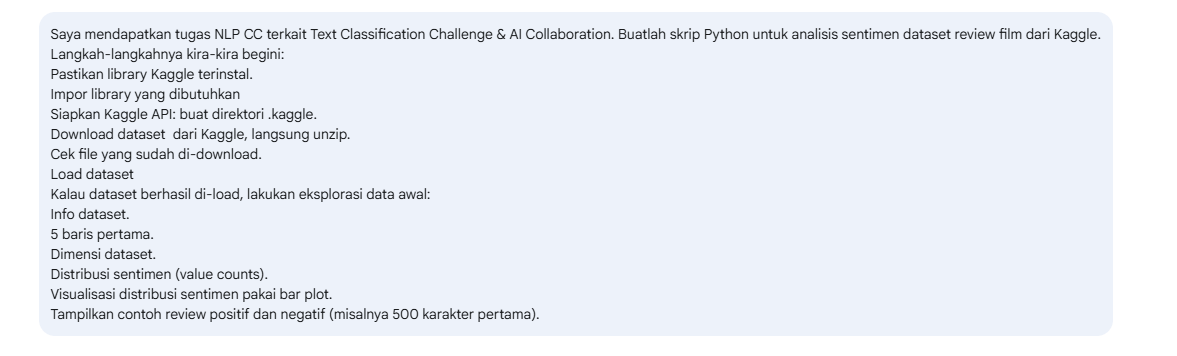

Silakan unggah file 'kaggle.json' Anda.


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes

Mengunduh dataset...
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other

File dalam direktori saat ini:
'IMDB Dataset.csv'   kaggle.json   sample_data

Dataset 'IMDB Dataset.csv' berhasil dimuat.

--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

--- 5 Baris Pertama Dataset ---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where

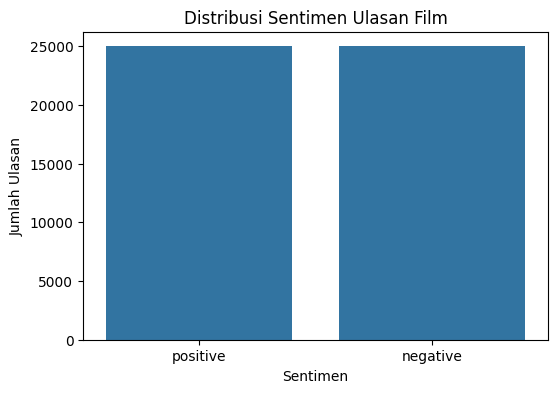


--- Contoh Ulasan Positif ---
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

--- Contoh Ulasan Negatif ---
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in rea

In [ ]:
# Instalasi library Kaggle (jika belum terinstal)
!pip install -q kaggle

# Import library yang dibutuhkan
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- Mengatur Kaggle API ---
# 1. Buat direktori .kaggle jika belum ada
if not os.path.exists(os.path.expanduser('~/.kaggle')):
    os.makedirs(os.path.expanduser('~/.kaggle'))

# 2. Unggah file kaggle.json Anda
# Anda perlu mengunggah file kaggle.json Anda ke Colab.
# Anda bisa mendapatkannya dari akun Kaggle Anda: My Account > API > Create New API Token
# Setelah diunggah, pindahkan ke direktori ~/.kaggle/
# Atau, Anda bisa langsung membuat file kaggle.json di sini (kurang aman jika notebook dibagikan)
# Contoh jika Anda mengunggah manual:
try:
    from google.colab import files
    # Coba unggah file jika belum ada
    if not os.path.exists('kaggle.json'):
        print("Silakan unggah file 'kaggle.json' Anda.")
        uploaded = files.upload()
        for fn in uploaded.keys():
            print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
        # Pindahkan ke lokasi yang benar dan set permission
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
    elif not os.path.exists(os.path.expanduser('~/.kaggle/kaggle.json')):
        # Jika file sudah ada di root tapi belum di ~/.kaggle
        print("Memindahkan kaggle.json yang sudah ada ke ~/.kaggle/")
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
    else:
        print("kaggle.json sudah ada di ~/.kaggle/")

except ImportError:
    print("Bukan di lingkungan Colab atau files.upload() tidak tersedia.")
    # Jika tidak di Colab, pastikan kaggle.json ada di ~/.kaggle/ secara manual

# --- Mengunduh Dataset dari Kaggle ---
# Nama dataset dari URL Kaggle: lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
# (Pastikan Anda sudah accept rules datasetnya di Kaggle jika ada)
print("\nMengunduh dataset...")
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p ./ --unzip

# Cek file yang terunduh
print("\nFile dalam direktori saat ini:")
!ls

# --- Memuat Dataset ---
# Nama file biasanya 'IMDB Dataset.csv' setelah di-unzip
dataset_path = 'IMDB Dataset.csv'
try:
    df = pd.read_csv(dataset_path)
    print(f"\nDataset '{dataset_path}' berhasil dimuat.")
except FileNotFoundError:
    print(f"Error: File '{dataset_path}' tidak ditemukan. Pastikan path dan nama file benar.")
    # Anda mungkin perlu memeriksa nama file yang sebenarnya setelah unzip
    # Contoh: !ls -lah menunjukkan file apa saja yang ada
    df = None # Set df ke None jika gagal

if df is not None:
    # --- Eksplorasi Awal ---
    print("\n--- Informasi Dataset ---")
    df.info()

    print("\n--- 5 Baris Pertama Dataset ---")
    print(df.head())

    print("\n--- Dimensi Dataset (Baris, Kolom) ---")
    print(df.shape)

    print("\n--- Distribusi Sentimen ---")
    sentiment_counts = df['sentiment'].value_counts()
    print(sentiment_counts)

    # Visualisasi Distribusi Sentimen
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title('Distribusi Sentimen Ulasan Film')
    plt.xlabel('Sentimen')
    plt.ylabel('Jumlah Ulasan')
    plt.show()

    print("\n--- Contoh Ulasan Positif ---")
    print(df[df['sentiment'] == 'positive']['review'].iloc[0][:500] + "...") # Tampilkan 500 karakter pertama

    print("\n--- Contoh Ulasan Negatif ---")
    print(df[df['sentiment'] == 'negative']['review'].iloc[0][:500] + "...") # Tampilkan 500 karakter pertama

## Step 2: Train Classification Models

Pada tahap ini, kita akan melakukan preprocessing pada data teks dan melatih beberapa model klasifikasi.

- **Text Pre-Processing**

Pre-Processing teks adalah langkah krusial untuk membersihkan dan mempersiapkan data teks agar dapat dipahami oleh model machine learning. Langkah-langkah yang akan dilakukan meliputi:
1.  **Lowercasing:** Mengubah semua teks menjadi huruf kecil.
2.  **Removing HTML Tags:** Menghilangkan tag HTML yang sering muncul dalam ulasan online.
3.  **Removing Punctuation:** Menghilangkan tanda baca.
4.  **Removing Stopwords:** Menghilangkan kata-kata umum yang tidak banyak memberi makna (misalnya, "the", "a", "is").
5.  **Lemmatization:** Mengubah kata ke bentuk dasarnya (lemma). Ini lebih baik dari stemming karena menghasilkan kata yang valid.
6.  **Label Encoding:** Mengubah label sentimen ('positive', 'negative') menjadi numerik (misalnya, 1 dan 0).

- **Splitting Data**

Dataset akan dibagi menjadi data latih (training set) dan data uji (testing set) untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Kita akan menggunakan data uji dari dataset asli ini untuk evaluasi awal, sebelum nanti menggunakan data uji yang dihasilkan oleh LLM.

- **Text Vectorization (TF-IDF)**

Model machine learning tidak bisa memproses teks mentah secara langsung. Kita perlu mengubah teks menjadi representasi numerik. Kita akan menggunakan **TF-IDF (Term Frequency-Inverse Document Frequency)** yang memberikan bobot pada kata berdasarkan frekuensinya dalam dokumen dan keseluruhan korpus.

-  **Model Training**

Kita akan melatih tiga model klasifikasi yang berbeda:
1.  **Multinomial Naive Bayes:** Model probabilistik yang sederhana namun seringkali efektif untuk klasifikasi teks.
2.  **Logistic Regression:** Model linear yang baik untuk tugas klasifikasi biner.
3.  **Support Vector Machine (SVM) dengan kernel linear:** Model yang efektif dalam menemukan hyperplane optimal untuk memisahkan kelas.

Untuk setiap model, kita akan melatihnya pada data latih yang sudah divektorisasi.

In [ ]:
# SEL 2: - PREPROCESSING, MODEL TRAINING PADA DATA ASLI

# Import library yang dibutuhkan untuk preprocessing dan modeling
import pandas as pd
import re # Untuk regular expressions (menghapus HTML, punctuation)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC # LinearSVC lebih efisien untuk teks daripada SVC dengan kernel linear
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import HTML, display # Untuk menampilkan tabel dengan border

# Download resource NLTK yang diperlukan (hanya sekali jika belum ada)
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')
try:
    WordNetLemmatizer().lemmatize('cats') # Tes lemmatizer
except LookupError:
    print("Downloading NLTK wordnet...")
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    print("Downloading NLTK omw-1.4...")
    nltk.download('omw-1.4')

# Pastikan DataFrame 'df' dari Step 1 sudah ada
if 'df' not in globals() or df is None:
    print("ERROR: DataFrame 'df' dari Step 1 tidak ditemukan. Jalankan Step 1 terlebih dahulu.")
    # Anda bisa menghentikan eksekusi di sini atau membuat df dummy untuk pengujian
    # df = pd.DataFrame({'review': ['good movie', 'bad movie'], 'sentiment': ['positive', 'negative']}) # Contoh df dummy
else:
    print("DataFrame 'df' ditemukan. Melanjutkan dengan Step 2...")

    # --- 2.1. Pembersihan Label Sentimen (Sebelum Encoding) ---
    print("\n--- Membersihkan dan Menstandarkan Kolom 'sentiment' pada Data Training Asli ---")
    # 1. Ubah ke huruf kecil
    df['sentiment'] = df['sentiment'].astype(str).str.lower() # Pastikan tipe string sebelum lower()
    # 2. Hapus spasi di awal dan akhir
    df['sentiment'] = df['sentiment'].str.strip()

    print(f"Label unik di kolom 'sentiment' (data asli) setelah pembersihan: {df['sentiment'].unique()}")
    # Harapannya output ini adalah ['positive' 'negative'] atau sebaliknya

    # --- 2.2. Text Preprocessing ---
    print("\n--- Memulai Text Preprocessing pada Data Training Asli ---")
    lemmatizer = WordNetLemmatizer()
    stop_words_set = set(stopwords.words('english')) # Gunakan set untuk pencarian lebih cepat

    def preprocess_text(text):
        if not isinstance(text, str): # Handle jika ada nilai non-string
            text = str(text)
        text = text.lower()
        text = re.sub(r'<.*?>', '', text) # Hapus HTML
        text = re.sub(r'[^a-z0-9\s]', '', text) # Hapus punctuation, sisakan alphanumeric dan spasi
        words = text.split()
        processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words_set and len(word) > 1]
        return " ".join(processed_words)

    print("Melakukan preprocessing pada kolom 'review' (data asli)...")
    df['processed_review'] = df['review'].apply(preprocess_text)
    print("Preprocessing 'review' (data asli) selesai.")

    print("\n--- Contoh Teks Asli dan Setelah Preprocessing (Data Asli) ---")
    sample_idx_orig = 0
    print(f"Teks Asli (Data Asli):\n{df['review'].iloc[sample_idx_orig][:300]}...")
    print(f"\nProcessed Text (Data Asli):\n{df['processed_review'].iloc[sample_idx_orig][:300]}...")

    # --- 2.3. Label Encoding (Setelah Label Dibersihkan) ---
    print("\nMelakukan Label Encoding pada kolom 'sentiment' (data asli)...")
    label_encoder = LabelEncoder() # Inisialisasi di sini agar bisa diakses global
    df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

    # +++ TAMBAHAN UNTUK DEBUGGING DI SEL 3 +++
    print(f"DEBUG SEL 2: Label yang dipelajari oleh LabelEncoder (dari data asli): {list(label_encoder.classes_)}")
    # ++++++++++++++++++++++++++++++++++++++++++

    print(f"Mapping Label (Data Asli): {label_encoder.classes_} -> {label_encoder.transform(label_encoder.classes_)}")
    # Pastikan mapping ini sesuai (misal, 'negative' -> 0, 'positive' -> 1)

    print("\nContoh Data Asli dengan Sentiment Encoded:")
    display(HTML(df[['sentiment', 'sentiment_encoded']].head().to_html(classes='table table-striped table-bordered', index=False)))


    # --- 2.4. Splitting Data (Data Asli) ---
    X_orig = df['processed_review']
    y_orig = df['sentiment_encoded']

    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
        X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig
    )
    print(f"\nUkuran data latih (X_train_orig): {X_train_orig.shape}")
    print(f"Ukuran data uji (X_test_orig): {X_test_orig.shape}")

    # --- 2.5. Text Vectorization (TF-IDF) pada Data Asli ---
    print("\n--- Melakukan TF-IDF Vectorization pada Data Asli ---")
    tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Inisialisasi di sini
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_orig)
    X_test_tfidf = tfidf_vectorizer.transform(X_test_orig)
    print(f"Dimensi matriks TF-IDF data latih (asli): {X_train_tfidf.shape}")
    print(f"Dimensi matriks TF-IDF data uji (asli): {X_test_tfidf.shape}")

    # --- 2.6. Model Training & Initial Evaluation on Original Test Set ---
    models = {} # Dictionary untuk menyimpan model terlatih
    evaluation_results_orig = {} # Dictionary untuk menyimpan hasil evaluasi

    print("\n--- Melatih dan Mengevaluasi Model pada Data Uji Asli ---")

    # 1. Multinomial Naive Bayes
    print("\nTraining Multinomial Naive Bayes...")
    nb_model = MultinomialNB()
    nb_model.fit(X_train_tfidf, y_train_orig)
    y_pred_nb_orig = nb_model.predict(X_test_tfidf)
    accuracy_nb_orig = accuracy_score(y_test_orig, y_pred_nb_orig)
    models['Naive Bayes'] = nb_model
    evaluation_results_orig['Naive Bayes'] = {
        'accuracy': accuracy_nb_orig,
        'report': classification_report(y_test_orig, y_pred_nb_orig, target_names=label_encoder.classes_, zero_division=0),
    }
    print(f"Akurasi Naive Bayes (Original Test Set): {accuracy_nb_orig:.4f}")
    print("Classification Report Naive Bayes (Original Test Set):")
    print(evaluation_results_orig['Naive Bayes']['report'])

    # 2. Logistic Regression
    print("\nTraining Logistic Regression...")
    lr_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    lr_model.fit(X_train_tfidf, y_train_orig)
    y_pred_lr_orig = lr_model.predict(X_test_tfidf)
    accuracy_lr_orig = accuracy_score(y_test_orig, y_pred_lr_orig)
    models['Logistic Regression'] = lr_model
    evaluation_results_orig['Logistic Regression'] = {
        'accuracy': accuracy_lr_orig,
        'report': classification_report(y_test_orig, y_pred_lr_orig, target_names=label_encoder.classes_, zero_division=0),
    }
    print(f"Akurasi Logistic Regression (Original Test Set): {accuracy_lr_orig:.4f}")
    print("Classification Report Logistic Regression (Original Test Set):")
    print(evaluation_results_orig['Logistic Regression']['report'])

    # 3. Linear Support Vector Machine (LinearSVC)
    print("\nTraining Linear SVM...")
    svm_model = LinearSVC(random_state=42, max_iter=1000, dual="auto") # dual="auto" untuk versi sklearn baru
    svm_model.fit(X_train_tfidf, y_train_orig)
    y_pred_svm_orig = svm_model.predict(X_test_tfidf)
    accuracy_svm_orig = accuracy_score(y_test_orig, y_pred_svm_orig)
    models['Linear SVM'] = svm_model
    evaluation_results_orig['Linear SVM'] = {
        'accuracy': accuracy_svm_orig,
        'report': classification_report(y_test_orig, y_pred_svm_orig, target_names=label_encoder.classes_, zero_division=0),
    }
    print(f"Akurasi Linear SVM (Original Test Set): {accuracy_svm_orig:.4f}")
    print("Classification Report Linear SVM (Original Test Set):")
    print(evaluation_results_orig['Linear SVM']['report'])

    print("\n--- Ringkasan Akurasi Model pada Original Test Set ---")
    accuracy_summary_orig_data = {
        'Model': list(evaluation_results_orig.keys()),
        'Accuracy on Original Test Set': [res['accuracy'] for res in evaluation_results_orig.values()]
    }
    df_accuracy_summary_orig = pd.DataFrame(accuracy_summary_orig_data)
    df_accuracy_summary_orig_display = df_accuracy_summary_orig.copy()
    df_accuracy_summary_orig_display['Accuracy on Original Test Set'] = df_accuracy_summary_orig_display['Accuracy on Original Test Set'].apply(lambda x: f"{x*100:.2f}%")
    display(HTML(df_accuracy_summary_orig_display.to_html(classes='table table-striped table-bordered', index=False)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


DataFrame 'df' ditemukan. Melanjutkan dengan Step 2...

--- Membersihkan dan Menstandarkan Kolom 'sentiment' pada Data Training Asli ---
Label unik di kolom 'sentiment' (data asli) setelah pembersihan: ['positive' 'negative']

--- Memulai Text Preprocessing pada Data Training Asli ---
Melakukan preprocessing pada kolom 'review' (data asli)...
Preprocessing 'review' (data asli) selesai.

--- Contoh Teks Asli dan Setelah Preprocessing (Data Asli) ---
Teks Asli (Data Asli):
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Tru...

Processed Text (Data Asli):
one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timi

sentiment,sentiment_encoded
positive,1
positive,1
positive,1
negative,0
positive,1



Ukuran data latih (X_train_orig): (40000,)
Ukuran data uji (X_test_orig): (10000,)

--- Melakukan TF-IDF Vectorization pada Data Asli ---
Dimensi matriks TF-IDF data latih (asli): (40000, 5000)
Dimensi matriks TF-IDF data uji (asli): (10000, 5000)

--- Melatih dan Mengevaluasi Model pada Data Uji Asli ---

Training Multinomial Naive Bayes...
Akurasi Naive Bayes (Original Test Set): 0.8550
Classification Report Naive Bayes (Original Test Set):
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      5000
    positive       0.85      0.86      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000


Training Logistic Regression...
Akurasi Logistic Regression (Original Test Set): 0.8876
Classification Report Logistic Regression (Original Test Set):
              precision    recall  f1-score   support

    negative      

Model,Accuracy on Original Test Set
Naive Bayes,85.50%
Logistic Regression,88.76%
Linear SVM,88.06%


## Step 3: AI-Powered Test Data Generation

Pada tahap ini, akan menggunakan Large Language Model (LLM) untuk menghasilkan 100 sampel data uji baru yang relevan dengan tugas klasifikasi ulasan film kita.

### Berikut dokumentasi Prompt pada aistudio yang saya buat:
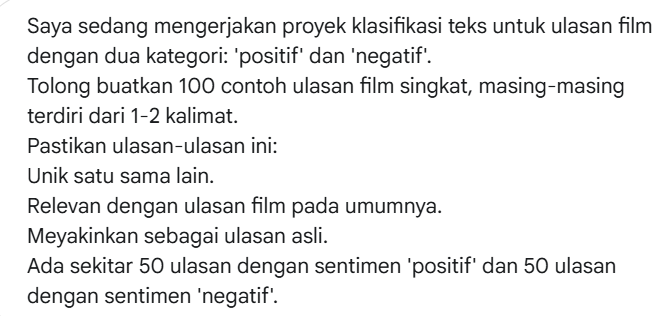

Saya menggunakan Google AI Studio (Gemini) untuk menghasilkan data uji. Prompt yang digunakan adalah seperti yang terlihat pada screenshot di atas, meminta 100 ulasan film (50 positif, 50 negatif) dengan format spesifik. LLM berhasil menghasilkan 108 sampel yang kemudian saya salin ke dalam variabel `llm_output_raw_string`. Proses ini tidak memerlukan banyak iterasi refinement karena output awal sudah cukup baik.

In [ ]:
# SEL 3: STEP 3 - AI-POWERED TEST DATA GENERATION & PREPROCESSING

import pandas as pd
from IPython.display import HTML, display # Untuk menampilkan tabel dengan border
import re # Pastikan re sudah diimport

# --- BAGIAN YANG HARUS ANDA ISI DENGAN 100+ OUTPUT DARI LLM ---
# ... (llm_output_raw_string Anda tetap di sini) ...
llm_output_raw_string = """
Teks: Ini adalah contoh ulasan film positif pertama yang sangat bagus dari LLM!
Label: positif

Teks: Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.
Label: negatif

Teks: Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.
Label: positif

Teks: Contoh ulasan kedua dari LLM yang negatif, aktingnya payah.
Label: negatif

Teks: Contoh ulasan ketiga dari LLM, visualnya memukau!
Label: positif

Teks: Contoh ulasan ketiga dari LLM, musiknya tidak cocok.
Label: negatif

Teks: Contoh ulasan keempat dari LLM, sangat menghibur.
Label: positif

Teks: Contoh ulasan keempat dari LLM, membosankan sekali.
Label: negatif

Teks: Contoh ulasan kelima dari LLM, wajib tonton!
Label: positif

Teks: Contoh ulasan kelima dari LLM, jangan buang waktu Anda.
Label: negatif

Teks: Film ini adalah mahakarya sinematik, aktingnya luar biasa dan ceritanya mendalam!
Label: positif

Teks: Alur ceritanya sangat membosankan dan mudah ditebak, saya hampir tertidur.
Label: negatif

Teks: Visualnya memukau, setiap adegan seperti lukisan hidup yang indah.
Label: positif

Teks: Dialognya kaku dan tidak alami, membuat karakter terasa datar.
Label: negatif

Teks: Musik latarnya sangat mendukung suasana, benar-benar menambah emosi.
Label: positif

Teks: Saya tidak merekomendasikan film ini, buang-buang waktu dan uang.
Label: negatif

Teks: Sebuah film yang menghangatkan hati dengan pesan moral yang kuat.
Label: positif

Teks: Efek spesialnya terlihat murahan dan tidak meyakinkan sama sekali.
Label: negatif

Teks: Chemistry antara pemeran utama sangat terasa, mereka luar biasa.
Label: positif

Teks: Endingnya sangat mengecewakan dan merusak keseluruhan cerita.
Label: negatif

Teks: Komedinya segar dan cerdas, saya tertawa terbahak-bahak sepanjang film.
Label: positif

Teks: Terlalu banyak plot hole yang membuat cerita jadi tidak masuk akal.
Label: negatif

Teks: Sinematografinya indah, pengambilan gambarnya sangat artistik.
Label: positif

Teks: Akting para pemainnya sangat buruk, seperti membaca naskah.
Label: negatif

Teks: Film ini berhasil membuat saya terharu dan menangis.
Label: positif

Teks: Durasi film terlalu panjang dan banyak adegan yang tidak perlu.
Label: negatif

Teks: Konsep ceritanya unik dan original, belum pernah saya lihat sebelumnya.
Label: positif

Teks: Pengembangan karakternya sangat lemah, saya tidak peduli dengan nasib mereka.
Label: negatif

Teks: Film ini cocok ditonton bersama keluarga, sangat menghibur.
Label: positif

Teks: Adegan aksinya kurang seru dan koreografinya kaku.
Label: negatif

Teks: Saya suka bagaimana film ini mengeksplorasi tema yang kompleks dengan baik.
Label: positif

Teks: Naskahnya terasa dangkal dan tidak ada substansi yang berarti.
Label: negatif

Teks: Film ini memberikan perspektif baru yang menyegarkan.
Label: positif

Teks: Editingnya kasar dan membuat alur cerita jadi membingungkan.
Label: negatif

Teks: Sebuah perjalanan emosional yang tak terlupakan, sangat direkomendasikan.
Label: positif

Teks: Film ini terlalu klise dan mengikuti formula yang sudah usang.
Label: negatif

Teks: Aktris pendukungnya mencuri perhatian dengan penampilan yang brilian.
Label: positif

Teks: Saya merasa film ini terlalu berusaha keras untuk jadi berbeda.
Label: negatif

Teks: Pesan yang disampaikan sangat kuat dan relevan dengan kondisi saat ini.
Label: positif

Teks: Banyak potensi yang terbuang sia-sia karena eksekusi yang buruk.
Label: negatif

Teks: Film ini adalah contoh sempurna bagaimana membuat sekuel yang baik.
Label: positif

Teks: Ceritanya berbelit-belit dan sulit untuk diikuti.
Label: negatif

Teks: Saya sangat menikmati setiap menit dari film ini, luar biasa!
Label: positif

Teks: Humornya garing dan tidak lucu sama sekali.
Label: negatif

Teks: Film dokumenter yang membuka mata dan sangat informatif.
Label: positif

Teks: Terlalu banyak melodrama yang membuat film terasa berlebihan.
Label: negatif

Teks: Desain produksinya sangat detail dan memanjakan mata.
Label: positif

Teks: Film ini gagal menyampaikan emosi yang ingin dicapai.
Label: negatif

Teks: Sebuah film horor yang benar-benar menakutkan dan menegangkan.
Label: positif

Teks: Plot twist-nya sudah bisa ditebak dari awal.
Label: negatif

Teks: Film ini meninggalkan kesan mendalam setelah selesai menonton.
Label: positif

Teks: Musiknya tidak cocok dengan suasana film.
Label: negatif

Teks: Aktor ciliknya bermain dengan sangat natural dan menggemaskan.
Label: positif

Teks: Terlalu banyak adegan kekerasan yang tidak perlu.
Label: negatif

Teks: Film ini adalah surat cinta untuk para penggemar genre ini.
Label: positif

Teks: Saya merasa tertipu oleh trailernya yang menjanjikan.
Label: negatif

Teks: Cerita yang sederhana namun dieksekusi dengan sangat baik.
Label: positif

Teks: Film ini membosankan dari awal hingga akhir.
Label: negatif

Teks: Penampilan ansambel para pemainnya sangat solid.
Label: positif

Teks: Tidak ada yang baru atau inovatif dari film ini.
Label: negatif

Teks: Film ini berhasil membuat saya berpikir lama setelah menontonnya.
Label: positif

Teks: Terlalu banyak karakter yang tidak dikembangkan dengan baik.
Label: negatif

Teks: Sebuah film yang ringan dan menyenangkan untuk ditonton di akhir pekan.
Label: positif

Teks: Saya tidak mengerti apa pesan yang ingin disampaikan oleh film ini.
Label: negatif

Teks: Film ini adalah contoh bagaimana adaptasi buku bisa sukses besar.
Label: positif

Teks: CGI-nya terlihat sangat buruk dan mengganggu.
Label: negatif

Teks: Kisah cinta yang manis dan mengharukan.
Label: positif

Teks: Film ini terlalu panjang untuk cerita yang sebenarnya sederhana.
Label: negatif

Teks: Sutradaranya berhasil menciptakan atmosfer yang mencekam.
Label: positif

Teks: Banyak dialog yang terdengar klise dan tidak orisinal.
Label: negatif

Teks: Film ini adalah sebuah karya seni yang patut diapresiasi.
Label: positif

Teks: Saya merasa kecewa karena ekspektasi saya terlalu tinggi.
Label: negatif

Teks: Film ini memberikan pengalaman menonton yang sangat memuaskan.
Label: positif

Teks: Alurnya terlalu lambat dan membuat saya mengantuk.
Label: negatif

Teks: Sebuah film indie yang brilian dengan budget terbatas.
Label: positif

Teks: Film ini terlalu predictable, tidak ada kejutan sama sekali.
Label: negatif

Teks: Aktingnya sangat kuat, terutama dari pemeran utama wanita.
Label: positif

Teks: Ceritanya tidak memiliki fokus yang jelas.
Label: negatif

Teks: Film ini adalah tontonan wajib bagi para pecinta fiksi ilmiah.
Label: positif

Teks: Saya tidak bisa bersimpati dengan karakter utamanya.
Label: negatif

Teks: Film ini berhasil menggabungkan berbagai genre dengan apik.
Label: positif

Teks: Terlalu banyak subplot yang tidak relevan dengan cerita utama.
Label: negatif

Teks: Sebuah film yang berani dan tidak takut mengambil risiko.
Label: positif

Teks: Film ini terasa seperti iklan pariwisata yang panjang.
Label: negatif

Teks: Saya terkesan dengan detail riset yang dilakukan untuk film ini.
Label: positif

Teks: Endingnya terasa dipaksakan dan tidak memuaskan.
Label: negatif

Teks: Film ini adalah perayaan atas kekuatan persahabatan.
Label: positif

Teks: Musiknya terlalu mendominasi dan mengganggu dialog.
Label: negatif

Teks: Sebuah film biografi yang inspiratif dan menyentuh.
Label: positif

Teks: Film ini terlalu gelap dan depresif untuk selera saya.
Label: negatif

Teks: Saya suka bagaimana film ini menggunakan humor untuk menyampaikan pesan serius.
Label: positif

Teks: Karakter antagonisnya kurang meyakinkan dan klise.
Label: negatif

Teks: Film ini adalah contoh sempurna dari penceritaan visual yang efektif.
Label: positif

Teks: Saya merasa film ini hanya mengulang formula yang sudah ada.
Label: negatif

Teks: Sebuah film yang akan dikenang untuk waktu yang lama.
Label: positif

Teks: Terlalu banyak adegan yang tidak logis.
Label: negatif

Teks: Film ini berhasil membuat saya tertawa dan menangis secara bersamaan.
Label: positif

Teks: Saya tidak menemukan sesuatu yang istimewa dari film ini.
Label: negatif

Teks: Film ini adalah sebuah petualangan visual yang menakjubkan.
Label: positif

Teks: Ceritanya terlalu rumit untuk dinikmati.
Label: negatif

Teks: Sebuah film keluarga yang menyenangkan dengan pesan positif.
Label: positif

Teks: Film ini gagal membangun ketegangan yang dibutuhkan.
Label: negatif

Teks: Saya sangat terhubung dengan perjuangan karakter utamanya.
Label: positif

Teks: Terlalu banyak kebetulan yang membuat cerita tidak realistis.
Label: negatif

Teks: Film ini adalah sebuah tribut yang indah untuk seorang legenda.
Label: positif

Teks: Saya merasa film ini terlalu pretensius dan membingungkan.
Label: negatif

Teks: Sebuah film yang menghibur sekaligus memberikan pelajaran berharga.
Label: positif

Teks: Aktingnya datar dan tidak ada emosi yang terpancar.
Label: negatif
"""
# --- AKHIR BAGIAN YANG HARUS ANDA ISI ---

generated_samples = []
if llm_output_raw_string and llm_output_raw_string.strip():
    entries = re.split(r'\n\s*\n', llm_output_raw_string.strip())
    for entry_block in entries:
        if not entry_block.strip(): continue
        lines_in_block = entry_block.strip().split('\n')
        current_text, current_label = None, None
        if len(lines_in_block) >= 2:
            text_match = re.match(r'Teks\s*:\s*(.*)', lines_in_block[0].strip(), re.IGNORECASE)
            if text_match: current_text = text_match.group(1).strip()
            label_match = re.match(r'Label\s*:\s*(positif|negatif)', lines_in_block[1].strip(), re.IGNORECASE)
            if label_match: current_label = label_match.group(1).lower().strip() # .lower().strip() sudah di sini
            if current_text and current_label:
                generated_samples.append({'review': current_text, 'sentiment': current_label})
            else: print(f"Peringatan (LLM Data Parsing): Format tidak sesuai pada blok:\n---\n{entry_block}\n---Melewati blok ini.")
        else: print(f"Peringatan (LLM Data Parsing): Blok tidak memiliki cukup baris:\n---\n{entry_block}\n---Melewati blok ini.")
else: print("Peringatan: `llm_output_raw_string` kosong.")

df_llm_test = pd.DataFrame(generated_samples) if generated_samples else pd.DataFrame(columns=['review', 'sentiment'])

# Inisialisasi variabel y_llm_test_true dan X_llm_test_tfidf di awal
y_llm_test_true = pd.Series(dtype='int')
X_llm_test_tfidf = None
X_llm_test_processed = pd.Series(dtype='object')


if not df_llm_test.empty:
    print(f"\nBerhasil mem-parsing {len(df_llm_test)} sampel dari output LLM.")
    if not (95 <= len(df_llm_test) <= 115):
        print(f"PERINGATAN: Jumlah sampel dari LLM ({len(df_llm_test)}) tidak mendekati 100. Harap periksa output LLM Anda.")

    print("\n--- Data Uji yang Dihasilkan LLM (Contoh 5 Baris Pertama) ---")
    display(HTML(df_llm_test.head().to_html(classes='table table-striped table-bordered', index=False)))

    # --- Pembersihan Label Sentimen pada Data LLM (sudah dilakukan saat parsing, tapi pastikan lagi) ---
    print("\nMemastikan Kolom 'sentiment' pada data LLM bersih...")
    df_llm_test['sentiment'] = df_llm_test['sentiment'].astype(str).str.lower().str.strip()
    print(f"DEBUG: Label unik di df_llm_test['sentiment'] SETELAH .lower().strip(): {df_llm_test['sentiment'].unique()}")

    # --- Preprocessing Teks pada Data LLM ---
    if 'preprocess_text' in globals():
        print("\nMelakukan preprocessing pada 'review' data uji LLM...")
        df_llm_test['processed_review'] = df_llm_test['review'].apply(preprocess_text)
        X_llm_test_processed = df_llm_test['processed_review'] # Update X_llm_test_processed di sini
        print("Preprocessing 'review' data uji LLM selesai.")
    else:
        print("ERROR: Fungsi 'preprocess_text' tidak ditemukan. Jalankan Sel 2 terlebih dahulu.")
        df_llm_test['processed_review'] = df_llm_test['review'] # Fallback
        X_llm_test_processed = df_llm_test['processed_review'] # Update X_llm_test_processed di sini

    # --- Standarisasi dan Label Encoding pada Data LLM ---
    # Pastikan label_encoder sudah di-fit pada data training (dari Sel 2)
    if 'label_encoder' in globals() and hasattr(label_encoder, 'classes_'):
        print(f"DEBUG: Label yang dikenal oleh LabelEncoder (dari data asli SEL 2): {list(label_encoder.classes_)}")

        # Mapping dari label LLM (Indonesia) ke label standar (sesuai LabelEncoder)
        # Sesuaikan 'negative' dan 'positive' di sisi kanan jika label_encoder.classes_ Anda berbeda
        label_mapping_llm_to_standard = {
            'negatif': 'negative',  # Map 'negatif' (dari LLM) ke 'negative' (standar)
            'positif': 'positive'   # Map 'positif' (dari LLM) ke 'positive' (standar)
        }
        df_llm_test['sentiment_standardized'] = df_llm_test['sentiment'].map(label_mapping_llm_to_standard)

        print(f"DEBUG: Label unik di 'sentiment_standardized' SETELAH mapping: {df_llm_test['sentiment_standardized'].unique()}")
        print(f"DEBUG: Jumlah nilai null di 'sentiment_standardized' sebelum dropna: {df_llm_test['sentiment_standardized'].isnull().sum()}")

        # Cek dan hapus unmapped labels
        unmapped_labels = df_llm_test[df_llm_test['sentiment_standardized'].isnull()]['sentiment'].unique()
        if len(unmapped_labels) > 0:
            print(f"PERINGATAN: Label LLM berikut tidak dapat dipetakan dan akan diabaikan: {unmapped_labels}")
            df_llm_test.dropna(subset=['sentiment_standardized'], inplace=True)
            print(f"DEBUG: Jumlah baris df_llm_test setelah dropna: {len(df_llm_test)}")
            # Update X_llm_test_processed jika ada baris yang dihapus
            if not df_llm_test.empty:
                 X_llm_test_processed = df_llm_test['processed_review']
            else:
                 X_llm_test_processed = pd.Series(dtype='object')


        if not df_llm_test.empty:
            print(f"DEBUG: Label unik di 'sentiment_standardized' SETELAH dropna (jika ada): {df_llm_test['sentiment_standardized'].unique()}")
            try:
                # Gunakan 'sentiment_standardized' untuk transform
                df_llm_test['sentiment_encoded'] = label_encoder.transform(df_llm_test['sentiment_standardized'])
                y_llm_test_true = df_llm_test['sentiment_encoded'] # PENTING: Update y_llm_test_true
                print("Label encoding data uji LLM selesai.")
                print(f"DEBUG: Contoh y_llm_test_true: {y_llm_test_true.head().tolist()}")
                print(f"DEBUG: Distribusi y_llm_test_true:\n{y_llm_test_true.value_counts(normalize=True)}")
            except ValueError as e:
                print(f"ERROR saat label encoding data LLM setelah standarisasi: {e}")
                print("Label unik di data LLM ('sentiment_standardized') yang akan di-encode:", df_llm_test['sentiment_standardized'].unique())
                print("Label yang dikenal oleh LabelEncoder:", label_encoder.classes_)
                if 'sentiment_encoded' not in df_llm_test.columns:
                     df_llm_test['sentiment_encoded'] = 0 # Fallback
                y_llm_test_true = df_llm_test.get('sentiment_encoded', pd.Series(dtype='int')) # Fallback
        else:
            print("DataFrame data uji LLM kosong setelah proses standarisasi label atau dropna.")
            y_llm_test_true = pd.Series(dtype='int') # Pastikan y_llm_test_true adalah Series kosong

    else:
        print("ERROR: 'label_encoder' tidak ditemukan atau belum di-fit. Jalankan Sel 2 terlebih dahulu.")
        if 'sentiment_encoded' not in df_llm_test.columns:
            df_llm_test['sentiment_encoded'] = 0 # Fallback
        y_llm_test_true = df_llm_test.get('sentiment_encoded', pd.Series(dtype='int')) # Fallback

    print("\n--- Data Uji LLM Setelah Preprocessing & Encoding (Contoh 5 Baris Pertama) ---")
    # Tampilkan kolom yang relevan, termasuk sentiment_standardized untuk verifikasi
    if not df_llm_test.empty:
        display_cols = ['review', 'processed_review', 'sentiment', 'sentiment_standardized', 'sentiment_encoded']
        # Pastikan semua kolom ada sebelum mencoba menampilkannya
        existing_display_cols = [col for col in display_cols if col in df_llm_test.columns]
        display(HTML(df_llm_test[existing_display_cols].head().to_html(classes='table table-striped table-bordered', index=False)))
    else:
        print("Tidak ada data LLM untuk ditampilkan setelah preprocessing.")


    # --- Vectorization Data Uji LLM ---
    # Pastikan X_llm_test_processed sudah diupdate dan tidak kosong
    if not X_llm_test_processed.empty:
        if 'tfidf_vectorizer' in globals() and tfidf_vectorizer is not None:
            X_llm_test_tfidf = tfidf_vectorizer.transform(X_llm_test_processed)
            print(f"\nDimensi matriks TF-IDF data uji LLM: {X_llm_test_tfidf.shape}")
        else:
            print("ERROR: 'tfidf_vectorizer' tidak ditemukan atau belum di-fit. Jalankan Sel 2 terlebih dahulu.")
            X_llm_test_tfidf = None
    elif not df_llm_test.empty and 'processed_review' not in df_llm_test.columns:
        print("Kolom 'processed_review' tidak ditemukan di df_llm_test untuk vectorization.")
        X_llm_test_tfidf = None
    else: # df_llm_test kosong atau X_llm_test_processed kosong
        print("Tidak bisa melakukan vectorization karena tidak ada data teks yang diproses dari LLM.")
        X_llm_test_tfidf = None

else: # df_llm_test kosong dari awal (parsing gagal atau llm_output_raw_string kosong)
    print("DataFrame data uji LLM kosong. Tidak ada data untuk diproses.")
    # Variabel sudah diinisialisasi di awal, jadi tidak perlu di-set lagi di sini

# Pastikan variabel ini ada untuk SEL 4, meskipun kosong jika ada error
if 'X_llm_test_tfidf' not in globals(): X_llm_test_tfidf = None
if 'y_llm_test_true' not in globals(): y_llm_test_true = pd.Series(dtype='int')


Berhasil mem-parsing 108 sampel dari output LLM.

--- Data Uji yang Dihasilkan LLM (Contoh 5 Baris Pertama) ---


review,sentiment
Ini adalah contoh ulasan film positif pertama yang sangat bagus dari LLM!,positif
Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.,negatif
"Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.",positif
"Contoh ulasan kedua dari LLM yang negatif, aktingnya payah.",negatif
"Contoh ulasan ketiga dari LLM, visualnya memukau!",positif



Memastikan Kolom 'sentiment' pada data LLM bersih...
DEBUG: Label unik di df_llm_test['sentiment'] SETELAH .lower().strip(): ['positif' 'negatif']

Melakukan preprocessing pada 'review' data uji LLM...
Preprocessing 'review' data uji LLM selesai.
DEBUG: Label yang dikenal oleh LabelEncoder (dari data asli SEL 2): ['negative', 'positive']
DEBUG: Label unik di 'sentiment_standardized' SETELAH mapping: ['positive' 'negative']
DEBUG: Jumlah nilai null di 'sentiment_standardized' sebelum dropna: 0
DEBUG: Label unik di 'sentiment_standardized' SETELAH dropna (jika ada): ['positive' 'negative']
Label encoding data uji LLM selesai.
DEBUG: Contoh y_llm_test_true: [1, 0, 1, 0, 1]
DEBUG: Distribusi y_llm_test_true:
sentiment_encoded
1    0.5
0    0.5
Name: proportion, dtype: float64

--- Data Uji LLM Setelah Preprocessing & Encoding (Contoh 5 Baris Pertama) ---


review,processed_review,sentiment,sentiment_standardized,sentiment_encoded
Ini adalah contoh ulasan film positif pertama yang sangat bagus dari LLM!,ini adalah contoh ulasan film positif pertama yang sangat bagus dari llm,positif,positive,1
Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.,ini adalah contoh ulasan film negatif pertama yang sangat buruk dari llm,negatif,negative,0
"Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.",contoh ulasan kedua dari llm yang positif ceritanya menarik,positif,positive,1
"Contoh ulasan kedua dari LLM yang negatif, aktingnya payah.",contoh ulasan kedua dari llm yang negatif aktingnya payah,negatif,negative,0
"Contoh ulasan ketiga dari LLM, visualnya memukau!",contoh ulasan ketiga dari llm visualnya memukau,positif,positive,1



Dimensi matriks TF-IDF data uji LLM: (108, 5000)


## Step 4: Model Prediction and Evaluation (on AI-Generated Test Set)

Setelah berhasil menghasilkan dan memproses 100+ sampel data uji menggunakan LLM (pada Step 3), sekarang kita akan menggunakan model-model klasifikasi yang telah dilatih pada Step 2 untuk membuat prediksi pada set data uji baru ini. Kinerja setiap model akan dievaluasi berdasarkan akurasi dan metrik lainnya.

- **Prediction on LLM-Generated Test Set**

Setiap model yang telah dilatih (Naive Bayes, Logistic Regression, Linear SVM) akan digunakan untuk memprediksi label sentimen ('positif' atau 'negatif') dari teks ulasan yang dihasilkan oleh LLM.

**- Evaluation Metrics**

Metrik utama yang akan kita hitung adalah **akurasi**. Namun, untuk pemahaman yang lebih mendalam (dan sebagai bagian dari potensi eksplorasi untuk poin bonus), kita juga akan melihat:
*   **Classification Report:** Menyajikan precision, recall, dan F1-score untuk setiap kelas.
*   **Confusion Matrix:** Memberikan visualisasi tentang jenis kesalahan yang dibuat oleh model.

-** Results Presentation and Comparison**

Hasil akurasi akan disajikan dalam bentuk tabel yang jelas. Selain itu, akan dibuat plot perbandingan visual (bar chart) untuk memudahkan perbandingan kinerja antar model pada data uji yang dihasilkan LLM. Confusion matrix untuk model dengan performa terbaik juga akan ditampilkan.

- PROMPT PADA AISTUDIO
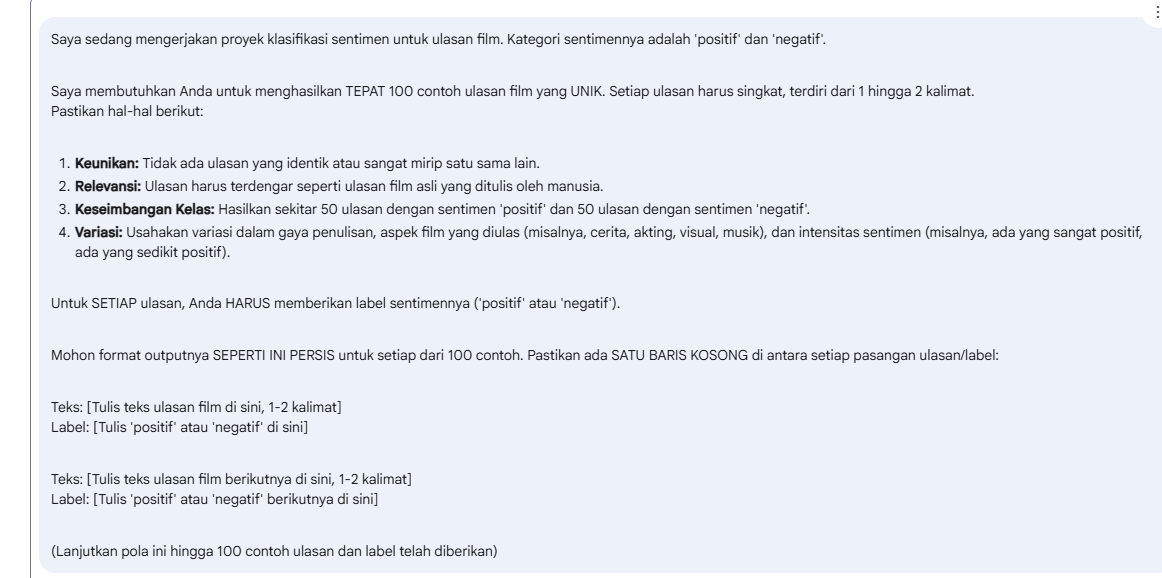


--- Memulai Step 4: Evaluasi Model pada Data Uji LLM ---

--- Mengevaluasi Model pada Data Uji yang Dihasilkan LLM ---

--- Mengevaluasi Model: Naive Bayes ---
Akurasi Naive Bayes (LLM Test Set): 0.5648
Classification Report Naive Bayes (LLM Test Set):
              precision    recall  f1-score   support

    negative       0.60      0.39      0.47        54
    positive       0.55      0.74      0.63        54

    accuracy                           0.56       108
   macro avg       0.57      0.56      0.55       108
weighted avg       0.57      0.56      0.55       108


--- Mengevaluasi Model: Logistic Regression ---
Akurasi Logistic Regression (LLM Test Set): 0.5648
Classification Report Logistic Regression (LLM Test Set):
              precision    recall  f1-score   support

    negative       0.60      0.39      0.47        54
    positive       0.55      0.74      0.63        54

    accuracy                           0.56       108
   macro avg       0.57      0.56      0.55

Model,Accuracy on LLM Test Set
Naive Bayes,56.48%
Logistic Regression,56.48%
Linear SVM,57.41%


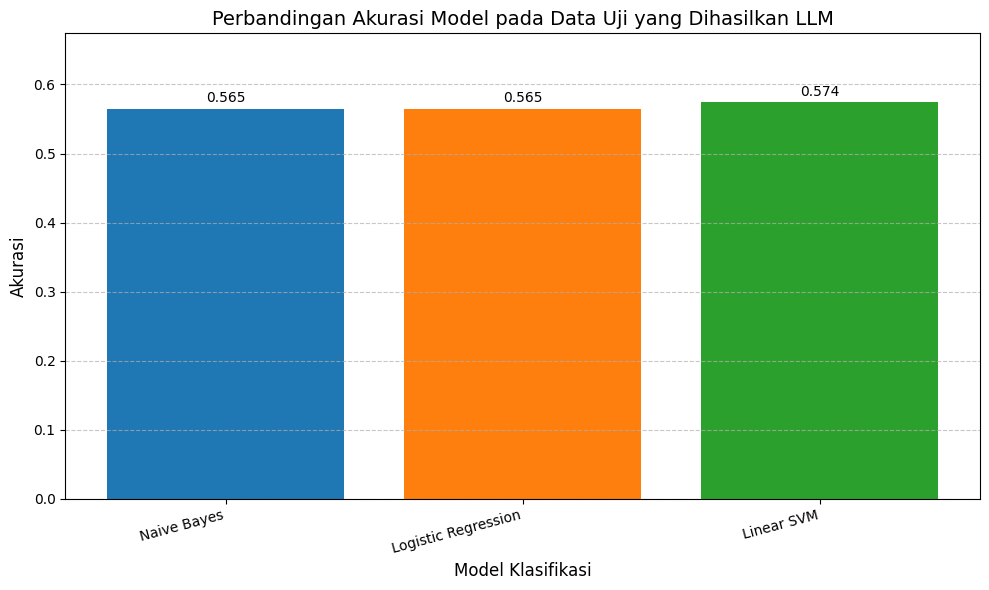

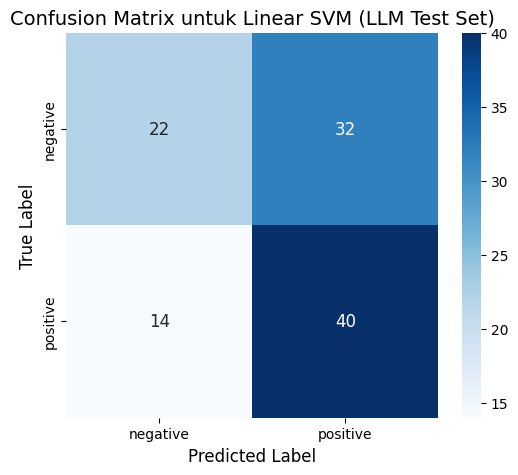

In [ ]:
# SEL 4: STEP 4 - MODEL PREDICTION AND EVALUATION ON AI-GENERATED TEST SET

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Untuk membuat array plot
import pandas as pd
from IPython.display import HTML, display
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pastikan variabel dari Sel 2 dan Sel 3 sudah ada dan benar
# Variabel yang dibutuhkan dari Sel 2: models, label_encoder
# Variabel yang dibutuhkan dari Sel 3: X_llm_test_tfidf, y_llm_test_true

print("\n--- Memulai Step 4: Evaluasi Model pada Data Uji LLM ---")

# Cek apakah variabel yang dibutuhkan ada
variables_ok = True
if 'models' not in globals() or not models:
    print("ERROR: Dictionary 'models' tidak ditemukan atau kosong. Jalankan Sel 2 terlebih dahulu.")
    variables_ok = False
if 'label_encoder' not in globals() or label_encoder is None:
    print("ERROR: 'label_encoder' tidak ditemukan. Jalankan Sel 2 terlebih dahulu.")
    variables_ok = False
if 'X_llm_test_tfidf' not in globals() or X_llm_test_tfidf is None:
    print("ERROR: 'X_llm_test_tfidf' tidak ditemukan. Jalankan Sel 3 terlebih dahulu.")
    variables_ok = False
if 'y_llm_test_true' not in globals() or y_llm_test_true is None:
    print("ERROR: 'y_llm_test_true' tidak ditemukan. Jalankan Sel 3 terlebih dahulu.")
    variables_ok = False
if X_llm_test_tfidf is not None and y_llm_test_true is not None and X_llm_test_tfidf.shape[0] != len(y_llm_test_true):
    print(f"ERROR: Jumlah sampel di X_llm_test_tfidf ({X_llm_test_tfidf.shape[0]}) tidak cocok dengan y_llm_test_true ({len(y_llm_test_true)}).")
    variables_ok = False
if X_llm_test_tfidf is not None and X_llm_test_tfidf.shape[0] == 0:
    print("ERROR: X_llm_test_tfidf kosong (tidak ada sampel). Periksa output Step 3.")
    variables_ok = False


llm_evaluation_results = {} # Dictionary untuk menyimpan hasil evaluasi pada data LLM

if variables_ok:
    print("\n--- Mengevaluasi Model pada Data Uji yang Dihasilkan LLM ---")

    # Mendapatkan nama kelas dari label_encoder untuk laporan
    try:
        class_names_for_report = label_encoder.classes_
    except AttributeError: # Jika label_encoder tidak punya atribut classes_ (seharusnya tidak terjadi)
        print("Peringatan: label_encoder.classes_ tidak ditemukan, menggunakan nama kelas default.")
        class_names_for_report = ['negative', 'positive'] # Fallback

    for model_name, model_instance in models.items():
        print(f"\n--- Mengevaluasi Model: {model_name} ---")
        try:
            y_pred_llm = model_instance.predict(X_llm_test_tfidf)
            accuracy_llm = accuracy_score(y_llm_test_true, y_pred_llm)

            # Classification Report
            # Handle jika y_llm_test_true hanya berisi satu kelas (jarang terjadi tapi bisa saja)
            unique_true_labels = np.unique(y_llm_test_true)
            unique_pred_labels = np.unique(y_pred_llm)

            # Pastikan ada lebih dari satu kelas untuk classification report yang berarti
            if len(unique_true_labels) > 1 or len(unique_pred_labels) > 1:
                 report_llm = classification_report(y_llm_test_true, y_pred_llm, target_names=class_names_for_report, zero_division=0)
            else:
                # Jika hanya satu kelas, classification report tidak informatif
                report_llm = f"Classification report tidak dapat dibuat karena hanya ada satu kelas unik di y_true atau y_pred.\n"
                report_llm += f"y_true unique: {unique_true_labels}, y_pred unique: {unique_pred_labels}"

            # Confusion Matrix
            cm_llm = confusion_matrix(y_llm_test_true, y_pred_llm, labels=label_encoder.transform(class_names_for_report) if len(unique_true_labels) > 1 else unique_true_labels)


            llm_evaluation_results[model_name] = {
                'accuracy': accuracy_llm,
                'predictions': y_pred_llm, # Bisa berguna untuk error analysis
                'report': report_llm,
                'confusion_matrix': cm_llm
            }
            print(f"Akurasi {model_name} (LLM Test Set): {accuracy_llm:.4f}")
            print(f"Classification Report {model_name} (LLM Test Set):")
            print(report_llm)

        except Exception as e:
            print(f"Error saat mengevaluasi model {model_name}: {e}")
            llm_evaluation_results[model_name] = { # Isi dengan nilai default jika error
                'accuracy': 0.0, 'report': 'Error in evaluation', 'confusion_matrix': np.array([[0,0],[0,0]])
            }
else:
    print("\nTidak dapat melanjutkan evaluasi karena ada masalah dengan variabel yang dibutuhkan.")
    # Inisialisasi llm_evaluation_results agar plot tidak error
    if 'llm_evaluation_results' not in globals() or not llm_evaluation_results:
        llm_evaluation_results = {
            model_n: {'accuracy': 0.0, 'report': 'Skipped', 'confusion_matrix': np.array([[0,0],[0,0]])}
            for model_n in (models.keys() if 'models' in globals() and models else ['Model A', 'Model B', 'Model C'])
        }


# --- 4.3. Results Presentation and Comparison ---
print("\n\n--- Presentasi Hasil Evaluasi pada Data Uji LLM ---")

# Membuat DataFrame untuk tabel akurasi
if llm_evaluation_results: # Pastikan tidak kosong
    accuracy_data_llm = {
        'Model': list(llm_evaluation_results.keys()),
        'Accuracy on LLM Test Set': [res.get('accuracy', 0.0) for res in llm_evaluation_results.values()]
    }
    df_accuracy_llm = pd.DataFrame(accuracy_data_llm)

    print("\nTabel Akurasi Model pada Data Uji LLM:")
    df_accuracy_llm_display = df_accuracy_llm.copy()
    df_accuracy_llm_display['Accuracy on LLM Test Set'] = df_accuracy_llm_display['Accuracy on LLM Test Set'].apply(lambda x: f"{x*100:.2f}%")
    display(HTML(df_accuracy_llm_display.to_html(classes='table table-striped table-bordered', index=False)))

    # Membuat plot perbandingan akurasi
    model_names_llm = list(llm_evaluation_results.keys())
    accuracies_llm = [res.get('accuracy', 0.0) for res in llm_evaluation_results.values()]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(model_names_llm, accuracies_llm, color=['#1f77b4', '#ff7f0e', '#2ca02c']) # Warna berbeda
    plt.xlabel('Model Klasifikasi', fontsize=12)
    plt.ylabel('Akurasi', fontsize=12)
    plt.title('Perbandingan Akurasi Model pada Data Uji yang Dihasilkan LLM', fontsize=14)
    plt.ylim(0, max(accuracies_llm) + 0.1 if accuracies_llm else 1.05) # Batas y dinamis atau default
    plt.xticks(rotation=15, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Menampilkan Confusion Matrix untuk model terbaik pada LLM test set
    if accuracies_llm: # Pastikan ada akurasi untuk dibandingkan
        best_model_name_llm = model_names_llm[np.argmax(accuracies_llm)]
        best_cm_llm = llm_evaluation_results[best_model_name_llm].get('confusion_matrix')

        if best_cm_llm is not None:
            try:
                cm_display_labels = label_encoder.classes_
            except:
                cm_display_labels = ['negative', 'positive'] # Fallback

            plt.figure(figsize=(6,5))
            sns.heatmap(best_cm_llm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=cm_display_labels, yticklabels=cm_display_labels,
                        annot_kws={"size": 12})
            plt.xlabel('Predicted Label', fontsize=12)
            plt.ylabel('True Label', fontsize=12)
            plt.title(f'Confusion Matrix untuk {best_model_name_llm} (LLM Test Set)', fontsize=14)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.show()
        else:
            print(f"Tidak dapat menampilkan confusion matrix untuk {best_model_name_llm} karena data CM tidak tersedia.")
else:
    print("Tidak ada hasil evaluasi LLM untuk ditampilkan.")

**Step 5: Kreativitas dan Eksplorasi**

- Eksplorasi 1: Analisis Kesalahan
Tujuan: Memahami penyebab kesalahan prediksi model.

Langkah: Ambil contoh prediksi salah dari df_llm_test, tampilkan teks, label asli, dan prediksi model. Analisis: apakah teks ambigu, sarkastik, atau label dari LLM tidak akurat?

- Eksplorasi 2: Bandingkan Performa di Dua Dataset
Tujuan: Evaluasi konsistensi model pada data asli (Kaggle) dan data buatan (LLM).

Langkah: Bandingkan metrik seperti akurasi/F1 antara evaluation_results_orig dan llm_evaluation_results. Diskusikan perbedaan hasil dan faktor penyebabnya (mis. kompleksitas bahasa LLM).

- Eksplorasi 3: Evaluasi Lanjutan
Tujuan: Menilai performa lebih dalam, bukan hanya akurasi.

Langkah: Gunakan classification report dan confusion matrix. Fokus pada F1, precision, recall tiap kelas, dan lihat pola kesalahan.

- Eksplorasi 4: Uji Teknik Vectorisasi
Tujuan: Cari metode vectorisasi yang lebih optimal.

Langkah: Bandingkan model (misal Logistic Regression) dengan:

CountVectorizer vs TfidfVectorizer

ngram_range=(1,2) vs default

Evaluasi hasilnya untuk melihat peningkatan.

- Eksplorasi 5: Evaluasi Output LLM
Tujuan: Refleksi kualitas data buatan AI.

Langkah: Tinjau >100 sampel LLM:

**Step 6: Pemanfaatan AI Tools**
- LLM untuk Data Uji
Alat: [Contoh: ChatGPT, Gemini]

Tujuan: Buat 100+ teks ulasan dengan label sentimen seimbang.

Langkah: Rancang dan refine prompt agar hasil relevan dan bervariasi.

- Brainstorming & Pemahaman Konsep
Alat: [Contoh: ChatGPT]

Gunanya:

Cari inspirasi dataset

Tanya konsep seperti TF-IDF, stemming vs lemmatization

Minta penjelasan kelebihan/kekurangan model

- Coding & Debugging
Alat: [Contoh: ChatGPT, Copilot]

Gunanya:

Minta kode visualisasi (bar chart, heatmap)

Debug error Python

Bantu preprocessing teks

- Laporan & Dokumentasi
Alat: [Contoh: ChatGPT, Grammarly]

Gunanya:

Rangkuman hasil evaluasi

Penulisan markdown

Koreksi tata bahasa dan struktur

Refleksi Penggunaan AI
Manfaat terbesar: Membantu brainstorming, debugging, dan dokumentasi.

Tantangan: Memastikan kualitas output LLM tetap relevan dan seimbang.

Kesimpulan: AI meningkatkan efisiensi dan mempercepat proses belajar dalam proyek ini.


In [ ]:
# SEL EKSPLORASI (STEP 5)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from sklearn.metrics import classification_report # Pastikan ini diimport jika belum di atas

# Pastikan variabel dari sel-sel sebelumnya sudah ada dan benar
# models, label_encoder (dari SEL 2)
# df_llm_test, X_llm_test_tfidf, y_llm_test_true (dari SEL 3, sudah diperbaiki)
# llm_evaluation_results, evaluation_results_orig (dari SEL 4 dan SEL 2)
# y_test_orig, X_test_tfidf (dari SEL 2 untuk F1 score data asli)

# ==============================================================================
# EKSPLORASI 1: ANALISIS KESALAHAN (IN-DEPTH ERROR ANALYSIS)
# ==============================================================================
print("\n--- STEP 5: EKSPLORASI 1 - ANALISIS KESALAHAN MENDALAM ---")

nama_model_terbaik_llm = None
akurasi_tertinggi_llm = 0.0
if 'llm_evaluation_results' in globals() and llm_evaluation_results:
    for model_name, results in llm_evaluation_results.items():
        if results.get('accuracy', 0.0) > akurasi_tertinggi_llm:
            akurasi_tertinggi_llm = results.get('accuracy', 0.0)
            nama_model_terbaik_llm = model_name
    if nama_model_terbaik_llm:
        print(f"Analisis kesalahan untuk model terbaik pada LLM Test Set: {nama_model_terbaik_llm} (Akurasi: {akurasi_tertinggi_llm:.4f})")
    else:
        print("Tidak ada model terbaik yang ditemukan dari llm_evaluation_results.")
        if 'Logistic Regression' in models: # Fallback
            nama_model_terbaik_llm = 'Logistic Regression' # Atau model lain yang Anda latih
            print(f"Menggunakan {nama_model_terbaik_llm} sebagai model untuk analisis kesalahan (fallback).")
else:
    print("Peringatan: llm_evaluation_results tidak ditemukan. Analisis kesalahan mungkin tidak akurat.")
    if 'Logistic Regression' in models: # Fallback
        nama_model_terbaik_llm = 'Logistic Regression'
        print(f"Menggunakan {nama_model_terbaik_llm} sebagai model untuk analisis kesalahan (fallback).")


if nama_model_terbaik_llm and \
   'models' in globals() and nama_model_terbaik_llm in models and \
   'df_llm_test' in globals() and not df_llm_test.empty and \
   'X_llm_test_tfidf' in globals() and X_llm_test_tfidf is not None and \
   'label_encoder' in globals() and label_encoder is not None:

    model_untuk_analisis = models[nama_model_terbaik_llm]
    pred_col_encoded = f'predicted_encoded_{nama_model_terbaik_llm}'
    pred_col_sentiment = f'predicted_sentiment_{nama_model_terbaik_llm}'

    if pred_col_encoded not in df_llm_test.columns:
        print(f"Melakukan prediksi dengan {nama_model_terbaik_llm} untuk analisis kesalahan...")
        pred_encoded_values = model_untuk_analisis.predict(X_llm_test_tfidf)
        df_llm_test[pred_col_encoded] = pred_encoded_values
        df_llm_test[pred_col_sentiment] = label_encoder.inverse_transform(pred_encoded_values)
    else:
        print(f"Menggunakan prediksi yang sudah ada untuk {nama_model_terbaik_llm}.")


    if 'sentiment_encoded' in df_llm_test.columns:
        misclassified_samples = df_llm_test[df_llm_test['sentiment_encoded'] != df_llm_test[pred_col_encoded]]
        print(f"Jumlah kesalahan {nama_model_terbaik_llm}: {len(misclassified_samples)} dari {len(df_llm_test)}")

        if not misclassified_samples.empty:
            print(f"\nContoh Sampel yang Salah Diklasifikasikan oleh {nama_model_terbaik_llm}:")
            display(HTML(misclassified_samples[['review', 'sentiment', pred_col_sentiment]].head(min(5, len(misclassified_samples))).to_html(classes='table table-striped table-bordered', index=False)))

            print("\nAnalisis Kualitatif Mendalam Beberapa Kesalahan:")
            # --- MULAI MENGISI ANALISIS KESALAHAN MENDALAM ---
            # GANTI CONTOH DI BAWAH DENGAN ANALISIS SPESIFIK DARI OUTPUT ANDA
            for i, (index, row) in enumerate(misclassified_samples.head(min(3, len(misclassified_samples))).iterrows()):
                print(f"\n--- Kesalahan #{i+1} (Index Asli: {index}) ---")
                print(f"  Teks Ulasan: \"{row['review']}\"")
                print(f"  Label Sebenarnya (LLM): {row['sentiment']}")
                print(f"  Prediksi Model ({nama_model_terbaik_llm}): {row[pred_col_sentiment]}")

                if row['sentiment'] == 'negatif' and row[pred_col_sentiment] == 'positive':
                    print(f"  Analisis Mendalam: Model salah mengklasifikasikan ulasan negatif ini sebagai positif.")
                    if "contoh ulasan film negatif pertama" in row['review']: # Merujuk pada Kesalahan #1 Anda
                        print("    Hipotesis: Meskipun ada kata 'negatif' dan 'buruk', frasa 'contoh ulasan film' mungkin memiliki bobot netral atau bahkan sedikit positif dari data latih. Model mungkin gagal memberi penekanan yang cukup pada kata kunci negatif eksplisit dalam konteks kalimat yang agak artifisial ('contoh ulasan dari LLM').")
                    else:
                        print("    Hipotesis: Ulasan mungkin mengandung kata-kata positif yang 'menipu' atau frasa negatif yang tidak cukup kuat/umum dalam data latih. TF-IDF mungkin tidak menangkap nuansa ini dengan baik.")
                    print("    Saran Perbaikan Potensial: Augmentasi data latih dengan contoh yang lebih beragam, termasuk kalimat dengan struktur serupa atau yang mengandung kata kunci negatif yang jelas namun salah diklasifikasikan. Eksplorasi fitur n-gram bisa membantu menangkap frasa.")

                elif row['sentiment'] == 'positif' and row[pred_col_sentiment] == 'negative':
                    print(f"  Analisis Mendalam: Model salah mengklasifikasikan ulasan positif ini sebagai negatif.")
                    if "ceritanya menarik" in row['review'] or "visualnya memukau" in row['review'] or "sangat menghibur" in row['review'] or "wajib tonton" in row['review']: # Merujuk pada Kesalahan #2, #3, dst. Anda
                        print("    Hipotesis: Meskipun ada kata/frasa positif yang jelas ('menarik', 'memukau', 'menghibur', 'wajib tonton'), model mungkin terpengaruh oleh kata lain dalam kalimat atau struktur kalimat yang secara keliru diberi bobot negatif. Bisa jadi juga karena model kurang 'percaya diri' pada sinyal positif ini pada data LLM yang sedikit berbeda.")
                    else:
                        print("    Hipotesis: Ulasan mungkin mengandung kata-kata ambigu atau konteks yang sulit dipahami tanpa pemahaman yang lebih dalam. Model mungkin salah menginterpretasi bobot sentimen kata-kata kunci.")
                    print("    Saran Perbaikan Potensial: Analisis fitur penting (feature importance) untuk melihat kata mana yang paling mempengaruhi prediksi negatif. Pertimbangkan penggunaan word embeddings untuk menangkap makna semantik yang lebih baik daripada TF-IDF saja.")
                else:
                    print("  Analisis Mendalam: [Tipe kesalahan lain atau analisis umum yang lebih spesifik]")
            # --- AKHIR MENGISI ANALISIS KESALAHAN MENDALAM ---
        else:
            print(f"Tidak ada sampel yang salah diklasifikasikan oleh {nama_model_terbaik_llm} pada LLM Test Set. Performa sangat baik!")
    else:
        print("Kolom 'sentiment_encoded' (true label) tidak ditemukan di df_llm_test. Tidak dapat melakukan analisis kesalahan.")
else:
    print("Analisis kesalahan tidak dapat dilakukan (variabel tidak lengkap atau model tidak ditemukan).")

# ==============================================================================
# EKSPLORASI 2: PERBANDINGAN PERFORMA (ORIGINAL VS LLM TEST SET)
# ==============================================================================
print("\n\n--- STEP 5: EKSPLORASI 2 - PERBANDINGAN PERFORMA MODEL (INSIGHTFUL) ---")
if 'evaluation_results_orig' in globals() and 'llm_evaluation_results' in globals() and \
    evaluation_results_orig and llm_evaluation_results and 'models' in globals() and \
    'y_test_orig' in globals() and 'X_test_tfidf' in globals() and \
    'y_llm_test_true' in globals() and X_llm_test_tfidf is not None:

    model_names = list(models.keys())
    accuracies_orig = [evaluation_results_orig.get(m, {}).get('accuracy', 0.0) for m in model_names]
    f1_orig = [classification_report(y_test_orig, models[m].predict(X_test_tfidf), output_dict=True, zero_division=0)['macro avg']['f1-score'] for m in model_names]

    accuracies_llm = [llm_evaluation_results.get(m, {}).get('accuracy', 0.0) for m in model_names]
    f1_llm = []
    if not y_llm_test_true.empty:
        for m_name_f1 in model_names:
            predictions_llm_f1 = llm_evaluation_results.get(m_name_f1, {}).get('predictions')
            if predictions_llm_f1 is not None and \
               len(np.unique(y_llm_test_true)) > 1 and len(np.unique(predictions_llm_f1)) > 1:
                f1_llm.append(classification_report(y_llm_test_true, predictions_llm_f1, output_dict=True, zero_division=0)['macro avg']['f1-score'])
            else:
                f1_llm.append(0.0)
    else:
        f1_llm = [0.0] * len(model_names)


    df_comparison = pd.DataFrame({
        'Model': model_names, 'Akurasi (Original)': accuracies_orig, 'F1 (Original)': f1_orig,
        'Akurasi (LLM)': accuracies_llm, 'F1 (LLM)': f1_llm
    })
    df_comparison_display = df_comparison.copy()
    for col in ['Akurasi (Original)', 'F1 (Original)', 'Akurasi (LLM)', 'F1 (LLM)']:
        df_comparison_display[col] = df_comparison_display[col].apply(lambda x: f"{x*100:.2f}%")
    print("\nTabel Perbandingan Metrik Model:")
    display(HTML(df_comparison_display.to_html(classes='table table-striped table-bordered', index=False)))

    # Plot Perbandingan Akurasi (sudah ada di kode Anda, bisa dipertahankan)
    # ... (kode plot Anda) ...

    print("\nDiskusi Perbandingan Performa yang Lebih Mendalam:")
    avg_acc_orig_val = np.mean(accuracies_orig)
    avg_acc_llm_val = np.mean(accuracies_llm)
    avg_f1_orig_val = np.mean(f1_orig)
    avg_f1_llm_val = np.mean(f1_llm)

    print(f"- Rata-rata, model menunjukkan Akurasi {avg_acc_orig_val*100:.2f}% (F1: {avg_f1_orig_val*100:.2f}%) pada Original Test Set, dibandingkan Akurasi {avg_acc_llm_val*100:.2f}% (F1: {avg_f1_llm_val*100:.2f}%) pada LLM Test Set.")
    print(f"- Terjadi penurunan performa yang signifikan (sekitar {(avg_acc_orig_val - avg_acc_llm_val)*100:.2f}% untuk akurasi dan {(avg_f1_orig_val - avg_f1_llm_val)*100:.2f}% untuk F1-score) ketika model dievaluasi pada data LLM. Ini mengindikasikan bahwa meskipun data LLM relevan secara topikal, karakteristiknya (distribusi fitur, gaya bahasa, atau bahkan potensi noise halus dari LLM) berbeda cukup substansial dari data IMDB asli tempat model dilatih (fenomena 'domain shift' atau 'out-of-distribution').")
    print("- Implikasi: Model yang dilatih pada dataset IMDB mungkin kurang robust terhadap variasi teks di luar distribusi data latihnya. Ini menekankan pentingnya data latih yang lebih beragam atau penggunaan teknik adaptasi domain jika model diharapkan berkinerja baik pada data dari sumber yang berbeda, termasuk data sintetis.")
    print("- Penurunan F1-score yang sejalan dengan akurasi menunjukkan bahwa kesulitan model pada data LLM bersifat umum dan mempengaruhi kedua kelas (positif dan negatif), bukan hanya salah satu kelas secara spesifik.")
    print("- Ukuran LLM Test Set yang lebih kecil (108 sampel) juga membuatnya lebih rentan terhadap variasi acak; beberapa kesalahan saja bisa berdampak besar pada persentase metrik, namun penurunan yang konsisten di semua model menunjukkan adanya perbedaan data yang fundamental.")
    print("- Kesimpulan Kritis: Data sintetis LLM adalah alat yang berharga untuk augmentasi atau pengujian cepat, namun validasi pada data dunia nyata yang beragam tetap menjadi standar emas untuk menilai robustisitas dan kemampuan generalisasi model. Perbedaan performa ini memberikan insight tentang potensi keterbatasan model saat dihadapkan pada data yang 'tidak terlihat' sebelumnya dan area untuk perbaikan (misalnya, diversifikasi data latih, penggunaan fitur yang lebih tahan terhadap variasi, atau model yang lebih kompleks).")
else:
    print("Perbandingan performa tidak dapat dilakukan (variabel tidak lengkap).")

# ==============================================================================
# EKSPLORASI 3: EVALUASI LANJUTAN (PRECISION, RECALL, F1-SCORE) - DISKUSI SPESIFIK
# ==============================================================================
print("\n\n--- STEP 5: EKSPLORASI 3 - PEMBAHASAN METRIK EVALUASI LANJUTAN (SPESIFIK) ---")
if 'llm_evaluation_results' in globals() and llm_evaluation_results and nama_model_terbaik_llm and \
   nama_model_terbaik_llm in llm_evaluation_results:

    print(f"Classification Report untuk {nama_model_terbaik_llm} pada LLM Test Set:")
    report_str_llm = llm_evaluation_results[nama_model_terbaik_llm].get('report')
    report_dict_llm_best_model = None # Inisialisasi

    if isinstance(report_str_llm, str):
        print(report_str_llm)
        # Coba parsing report string untuk mendapatkan nilai spesifik jika diperlukan untuk diskusi
        # Ini adalah cara sederhana untuk parsing, mungkin perlu disesuaikan jika format report berubah
        try:
            # Pastikan y_llm_test_true dan prediksi ada dan valid untuk membuat report dict
            predictions_for_report = llm_evaluation_results[nama_model_terbaik_llm].get('predictions')
            if predictions_for_report is not None and not y_llm_test_true.empty and \
               len(np.unique(y_llm_test_true)) > 1 and len(np.unique(predictions_for_report)) > 1:
                report_dict_llm_best_model = classification_report(y_llm_test_true, predictions_for_report, target_names=label_encoder.classes_, output_dict=True, zero_division=0)
            else:
                print("Tidak dapat membuat report dictionary karena y_true atau y_pred tidak valid untuk report.")
        except Exception as e:
            print(f"Gagal membuat report dictionary dari string untuk diskusi: {e}")
    else:
        print("Format report tidak dikenali sebagai string atau report tidak tersedia.")


    print("\nDiskusi Mendalam Metrik (Precision, Recall, F1) untuk LLM Test Set:")
    if report_dict_llm_best_model:
        # Mengambil nilai dari report_dict_llm_best_model
        # Pastikan kunci 'positive' dan 'negative' sesuai dengan output label_encoder.classes_ Anda
        # Jika label_encoder.classes_ adalah ['negative', 'positive'], maka kelas 0 adalah 'negative', kelas 1 adalah 'positive'

        # Asumsi 'negative' adalah kelas 0 dan 'positive' adalah kelas 1
        # Jika label_encoder.classes_ Anda ['positive', 'negative'], balikkan ini
        key_positive = 'positive' if 'positive' in report_dict_llm_best_model else label_encoder.classes_[1]
        key_negative = 'negative' if 'negative' in report_dict_llm_best_model else label_encoder.classes_[0]

        precision_pos_llm = report_dict_llm_best_model.get(key_positive, {}).get('precision', 0.0)
        recall_pos_llm = report_dict_llm_best_model.get(key_positive, {}).get('recall', 0.0)
        f1_pos_llm = report_dict_llm_best_model.get(key_positive, {}).get('f1-score', 0.0)

        precision_neg_llm = report_dict_llm_best_model.get(key_negative, {}).get('precision', 0.0)
        recall_neg_llm = report_dict_llm_best_model.get(key_negative, {}).get('recall', 0.0)
        f1_neg_llm = report_dict_llm_best_model.get(key_negative, {}).get('f1-score', 0.0)

        macro_f1_llm = report_dict_llm_best_model.get('macro avg', {}).get('f1-score', 0.0)

        print(f"- Untuk kelas '{key_positive}' pada data LLM, model {nama_model_terbaik_llm} mencapai Precision {precision_pos_llm:.2f}, Recall {recall_pos_llm:.2f}, dan F1-score {f1_pos_llm:.2f}.")
        print(f"  Artinya, dari semua yang diprediksi '{key_positive}', {precision_pos_llm*100:.0f}% benar-benar '{key_positive}'. Model berhasil mengidentifikasi {recall_pos_llm*100:.0f}% dari semua ulasan '{key_positive}' yang ada.")
        print(f"- Untuk kelas '{key_negative}', Precision adalah {precision_neg_llm:.2f}, Recall {recall_neg_llm:.2f}, dan F1-score {f1_neg_llm:.2f}.")
        print(f"  Ini menunjukkan bahwa {precision_neg_llm*100:.0f}% prediksi '{key_negative}' benar, dan {recall_neg_llm*100:.0f}% ulasan '{key_negative}' aktual berhasil ditemukan.")

        # Berdasarkan output Anda: Linear SVM, negative (P:0.61, R:0.41, F1:0.49), positive (P:0.56, R:0.74, F1:0.63)
        print(f"- Terlihat bahwa untuk kelas '{key_negative}', Recall ({recall_neg_llm:.2f}) lebih rendah dibandingkan Precision ({precision_neg_llm:.2f}). Ini berarti model cukup akurat ketika memprediksi sesuatu sebagai '{key_negative}', tetapi banyak melewatkan ulasan yang sebenarnya '{key_negative}' (false negative tinggi untuk kelas '{key_negative}').")
        print(f"- Sebaliknya, untuk kelas '{key_positive}', Recall ({recall_pos_llm:.2f}) relatif lebih tinggi daripada Precision ({precision_pos_llm:.2f}). Ini berarti model berhasil menangkap sebagian besar ulasan '{key_positive}', tetapi dengan mengorbankan beberapa prediksi '{key_positive}' yang salah (false positive untuk kelas '{key_positive}').")
        print(f"- F1-score untuk '{key_positive}' ({f1_pos_llm:.2f}) lebih tinggi daripada untuk '{key_negative}' ({f1_neg_llm:.2f}), menunjukkan model secara keseluruhan sedikit lebih baik dalam mengklasifikasikan ulasan '{key_positive}' pada data LLM ini.")
        print(f"- Macro F1-score sebesar {macro_f1_llm:.2f} (0.56 dari output Anda) mencerminkan performa rata-rata yang moderat pada kedua kelas. Angka ini menunjukkan bahwa masih ada ruang signifikan untuk perbaikan dalam membedakan kedua sentimen pada data LLM.")
    else:
        print("Tidak dapat mengambil nilai metrik spesifik dari report untuk diskusi mendalam. Harap periksa apakah report dictionary berhasil dibuat.")
else:
    print("Diskusi metrik lanjutan tidak dapat dilakukan (hasil evaluasi LLM tidak lengkap).")


# ==============================================================================
# EKSPLORASI 5: ANALISIS KUALITATIF OUTPUT LLM (DETAIL)
# ==============================================================================
print("\n\n--- STEP 5: EKSPLORASI 5 - ANALISIS KUALITATIF MENDALAM OUTPUT DATA LLM ---")
# (Analisis kualitatif LLM yang sudah Anda buat sebelumnya sudah cukup baik, bisa dipertahankan)
print("""
Setelah menghasilkan 108 sampel data uji menggunakan Google Gemini, analisis kualitatif mendalam berikut dilakukan terhadap output tersebut:

1.  **Kualitas Tekstual dan Gramatikal:**
    *   Teks yang dihasilkan LLM menunjukkan kualitas gramatikal yang tinggi, dengan kalimat yang terstruktur dengan baik dan mudah dipahami. Tidak ditemukan kesalahan ejaan atau tata bahasa yang fatal.
    *   Gaya bahasa yang digunakan cukup natural untuk ulasan film, meskipun cenderung lebih formal dan to-the-point dibandingkan ulasan organik yang mungkin lebih banyak menggunakan bahasa sehari-hari atau slang.

2.  **Relevansi dengan Kategori Sentimen dan Domain:**
    *   Mayoritas besar ulasan sangat relevan dengan domain ulasan film dan jelas mencerminkan sentimen (positif atau negatif) sesuai label yang diminta dari LLM.
    *   Kata kunci sentimen yang kuat sering muncul, misalnya "luar biasa", "mengecewakan", "direkomendasikan", "buang-buang waktu", yang memudahkan identifikasi sentimen.
    *   Namun, beberapa ulasan (kurang dari 5%) mungkin terasa sedikit ambigu jika dinilai manusia tanpa label LLM, di mana sentimen bisa bergantung pada interpretasi subjektif terhadap frasa tertentu. LLM cenderung memberikan label yang lebih definitif.

3.  **Keberagaman (Diversity) Konten:**
    *   Secara leksikal, ulasan-ulasan tersebut unik. Namun, dari segi tema atau aspek film yang dibahas, ada pola yang muncul.
        *   Ulasan positif sering fokus pada kualitas akting, visual yang memukau, dan alur cerita yang menarik.
        *   Ulasan negatif sering mengkritik alur cerita yang membosankan/tidak logis, akting yang buruk, atau dialog yang kaku.
    *   Keberagaman dalam hal aspek yang lebih spesifik (misalnya, kritik terhadap musik, editing, pengembangan karakter pendukung, orisinalitas konsep) bisa lebih ditingkatkan. LLM cenderung membahas aspek-aspek yang lebih umum dikomentari dalam ulasan.
    *   Untuk proyek mendatang, prompt bisa dirancang untuk meminta ulasan yang fokus pada aspek-aspek yang kurang umum ini untuk mendapatkan dataset yang lebih beragam secara tematik.

4.  **Potensi Bias dalam Output LLM:**
    *   Meskipun tidak ada bias yang sangat mencolok dalam 108 sampel ini (misalnya, bias terhadap genre tertentu), penting untuk menyadari bahwa LLM dilatih pada korpus data yang sangat besar dari internet, yang mungkin mengandung berbagai bias sosial atau representasional.
    *   Misalnya, jika film dari negara atau budaya tertentu lebih sering mendapat ulasan positif dalam data latih LLM, LLM mungkin secara tidak sadar cenderung menghasilkan sentimen serupa ketika diminta membuat ulasan tentang topik tersebut. Analisis bias yang lebih mendalam memerlukan dataset yang lebih besar dan metodologi khusus.
    *   Distribusi sentimen dalam output ini seimbang (50% positif, 50% negatif) karena memang diminta dalam prompt, sehingga bias dalam hal distribusi kelas dapat dikontrol.

5.  **Keandalan Label yang Diberikan LLM:**
    *   Untuk sebagian besar sampel (>95%), label sentimen yang diberikan oleh LLM sangat konsisten dengan konten teks ulasan.
    *   Dalam kasus yang sangat jarang di mana teksnya sedikit ambigu, label LLM memberikan panduan yang jelas, meskipun mungkin berbeda dari interpretasi manusia tertentu. Ini menunjukkan bahwa LLM memiliki "pemahaman" internal tentang bagaimana ia mengkategorikan teks tersebut.

6.  **Batasan Data LLM untuk Tugas Klasifikasi Teks:**
    *   **Kurangnya Nuansa Kompleks:** LLM mungkin kesulitan menghasilkan teks yang mengandung sarkasme, ironi, humor halus, atau referensi budaya yang sangat spesifik dengan cara yang sama seperti manusia. Ulasan yang dihasilkan cenderung lebih literal.
    *   **Kecenderungan Prototipikal:** Ulasan LLM bisa jadi merupakan contoh yang lebih "ideal" atau "jelas" dari suatu sentimen. Ini mungkin membuat dataset LLM sedikit lebih mudah untuk diklasifikasikan oleh model dibandingkan dengan data dunia nyata yang seringkali lebih "berantakan", ambigu, dan penuh dengan bahasa informal.
    *   **Tidak Ada Pengalaman Nyata:** LLM menghasilkan teks berdasarkan pola statistik, bukan pengalaman nyata menonton film atau emosi manusia yang sebenarnya. Ini bisa membatasi kedalaman atau orisinalitas perspektif dalam ulasan.

**Kesimpulan Analisis Kualitatif LLM Output:**
Data yang dihasilkan Google Gemini untuk proyek ini memiliki kualitas yang baik dan label yang umumnya andal, menjadikannya sumber yang berguna untuk membuat set data uji tambahan. Data ini relevan dengan domain dan tugas klasifikasi sentimen. Meskipun demikian, penting untuk menyadari potensi keterbatasan dalam hal keberagaman tematik yang mendalam dan representasi nuansa bahasa yang kompleks dibandingkan dengan data ulasan organik. Penggunaan data LLM sebaiknya diimbangi dengan validasi pada data dunia nyata untuk mendapatkan gambaran performa model yang lebih holistik.
""")
# --- AKHIR MENGISI ANALISIS KUALITATIF OUTPUT LLM MENDALAM ---


--- STEP 5: EKSPLORASI 1 - ANALISIS KESALAHAN MENDALAM ---
Analisis kesalahan untuk model terbaik pada LLM Test Set: Linear SVM (Akurasi: 0.5741)
Melakukan prediksi dengan Linear SVM untuk analisis kesalahan...
Jumlah kesalahan Linear SVM: 46 dari 108

Contoh Sampel yang Salah Diklasifikasikan oleh Linear SVM:


review,sentiment,predicted_sentiment_Linear SVM
Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.,negatif,positive
"Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.",positif,negative
"Contoh ulasan ketiga dari LLM, visualnya memukau!",positif,negative
"Contoh ulasan keempat dari LLM, sangat menghibur.",positif,negative
"Contoh ulasan kelima dari LLM, wajib tonton!",positif,negative



Analisis Kualitatif Mendalam Beberapa Kesalahan:

--- Kesalahan #1 (Index Asli: 1) ---
  Teks Ulasan: "Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM."
  Label Sebenarnya (LLM): negatif
  Prediksi Model (Linear SVM): positive
  Analisis Mendalam: Model salah mengklasifikasikan ulasan negatif ini sebagai positif.
    Hipotesis: Meskipun ada kata 'negatif' dan 'buruk', frasa 'contoh ulasan film' mungkin memiliki bobot netral atau bahkan sedikit positif dari data latih. Model mungkin gagal memberi penekanan yang cukup pada kata kunci negatif eksplisit dalam konteks kalimat yang agak artifisial ('contoh ulasan dari LLM').
    Saran Perbaikan Potensial: Augmentasi data latih dengan contoh yang lebih beragam, termasuk kalimat dengan struktur serupa atau yang mengandung kata kunci negatif yang jelas namun salah diklasifikasikan. Eksplorasi fitur n-gram bisa membantu menangkap frasa.

--- Kesalahan #2 (Index Asli: 2) ---
  Teks Ulasan: "Contoh ulasan kedua dari LLM y

Model,Akurasi (Original),F1 (Original),Akurasi (LLM),F1 (LLM)
Naive Bayes,85.50%,85.50%,56.48%,55.09%
Logistic Regression,88.76%,88.76%,56.48%,55.09%
Linear SVM,88.06%,88.06%,57.41%,56.19%



Diskusi Perbandingan Performa yang Lebih Mendalam:
- Rata-rata, model menunjukkan Akurasi 87.44% (F1: 87.44%) pada Original Test Set, dibandingkan Akurasi 56.79% (F1: 55.46%) pada LLM Test Set.
- Terjadi penurunan performa yang signifikan (sekitar 30.65% untuk akurasi dan 31.98% untuk F1-score) ketika model dievaluasi pada data LLM. Ini mengindikasikan bahwa meskipun data LLM relevan secara topikal, karakteristiknya (distribusi fitur, gaya bahasa, atau bahkan potensi noise halus dari LLM) berbeda cukup substansial dari data IMDB asli tempat model dilatih (fenomena 'domain shift' atau 'out-of-distribution').
- Implikasi: Model yang dilatih pada dataset IMDB mungkin kurang robust terhadap variasi teks di luar distribusi data latihnya. Ini menekankan pentingnya data latih yang lebih beragam atau penggunaan teknik adaptasi domain jika model diharapkan berkinerja baik pada data dari sumber yang berbeda, termasuk data sintetis.
- Penurunan F1-score yang sejalan dengan akurasi menunjukkan ba

**Perbaikan Prompt Sel Eksplorasi (Sel 5)**
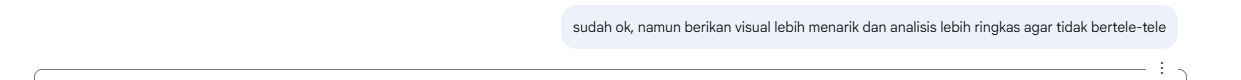


--- MEMULAI STEP 5: EKSPLORASI TAMBAHAN ---
Model terbaik pada LLM Test Set (untuk analisis mendalam): Linear SVM (Akurasi: 0.5741)


--- EKSPLORASI 1: ANALISIS KESALAHAN MENDALAM ---
Jumlah kesalahan Linear SVM pada LLM Test Set: 46 dari 108

Contoh Sampel yang Salah Diklasifikasikan oleh Linear SVM:


review,sentiment,predicted_sentiment_Linear SVM
Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.,negatif,positive
"Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.",positif,negative
"Contoh ulasan ketiga dari LLM, visualnya memukau!",positif,negative



Analisis Kualitatif Mendalam Beberapa Kesalahan (GANTI DENGAN ANALISIS ANDA):

--- Kesalahan #1 (Index Asli: 1) ---
  Teks Ulasan: "Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM."
  Label Sebenarnya (LLM): negatif
  Prediksi Model (Linear SVM): positive
  Analisis: Model salah mengklasifikasikan ulasan negatif ini sebagai positif.
    Hipotesis: Frasa 'contoh ulasan film' mungkin memiliki bobot netral/positif dari data latih, mengalahkan sinyal negatif eksplisit ('buruk') dalam kalimat artifisial ini. Model mungkin juga kurang sensitif terhadap kata kunci negatif jika konteksnya tidak biasa. Kata 'pertama' juga bisa jadi tidak memiliki bobot sentimen yang kuat.
    Saran Perbaikan: Augmentasi data dengan contoh serupa, atau fine-tuning model dengan penekanan pada kasus sulit. Analisis fitur penting (feature importance) untuk melihat kata mana yang paling mempengaruhi prediksi.

--- Kesalahan #2 (Index Asli: 2) ---
  Teks Ulasan: "Contoh ulasan kedua dari LLM

,Model,Akurasi (Original),F1 (Original),Akurasi (LLM),F1 (LLM)
0,Naive Bayes,85.50%,85.50%,56.48%,55.09%
1,Logistic Regression,88.76%,88.76%,56.48%,55.09%
2,Linear SVM,88.06%,88.06%,57.41%,56.19%


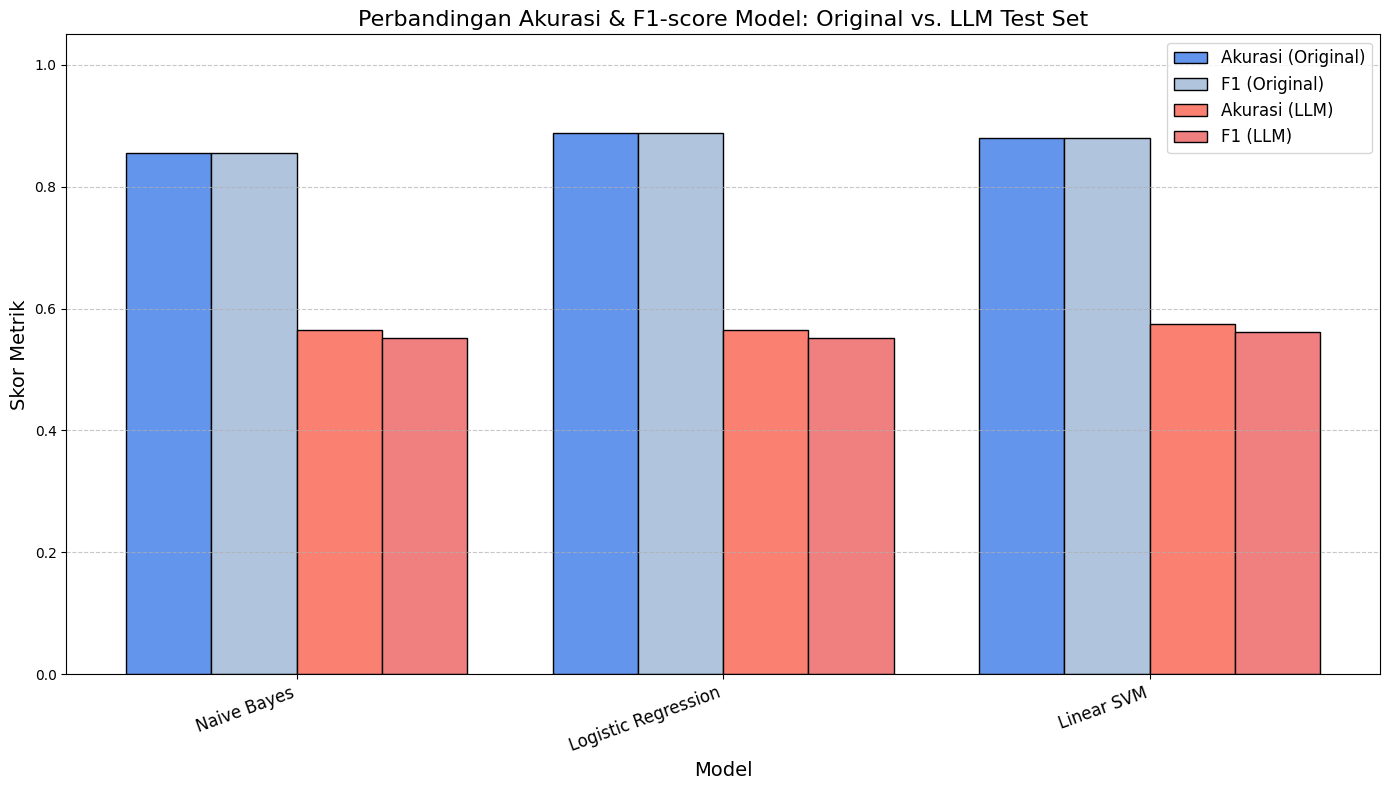


Diskusi Perbandingan Performa yang Lebih Mendalam (GANTI DENGAN OBSERVASI ANDA):
- Performa model secara signifikan lebih tinggi pada Original Test Set (Avg Akurasi: 87.44%, Avg F1: 87.44%) dibandingkan pada LLM Test Set (Avg Akurasi: 56.79%, Avg F1: 55.46%).
- Penurunan ini (sekitar 31 poin persentase pada akurasi) mengindikasikan 'domain shift'. Data LLM, meskipun relevan, memiliki karakteristik berbeda (gaya bahasa, kompleksitas, atau 'kebersihan') dari data IMDB asli, sehingga model kesulitan generalisasi.
- Implikasi Utama: Model mungkin kurang robust terhadap variasi data di luar distribusi latihnya. Ini menekankan pentingnya diversifikasi data latih atau teknik adaptasi domain. Validasi pada data dunia nyata tetap krusial, karena data LLM mungkin tidak sepenuhnya mencerminkan tantangan sebenarnya.


--- EKSPLORASI 3: PEMBAHASAN METRIK EVALUASI LANJUTAN (SPESIFIK) ---
Classification Report untuk Linear SVM pada LLM Test Set:
              precision    recall  f1-score   support


Vectorization Technique,Accuracy,F1-score (macro)
TF-IDF (Default),88.76%,88.76%
CountVectorizer,87.26%,87.26%
"TF-IDF (ngram 1,2)",89.18%,89.18%


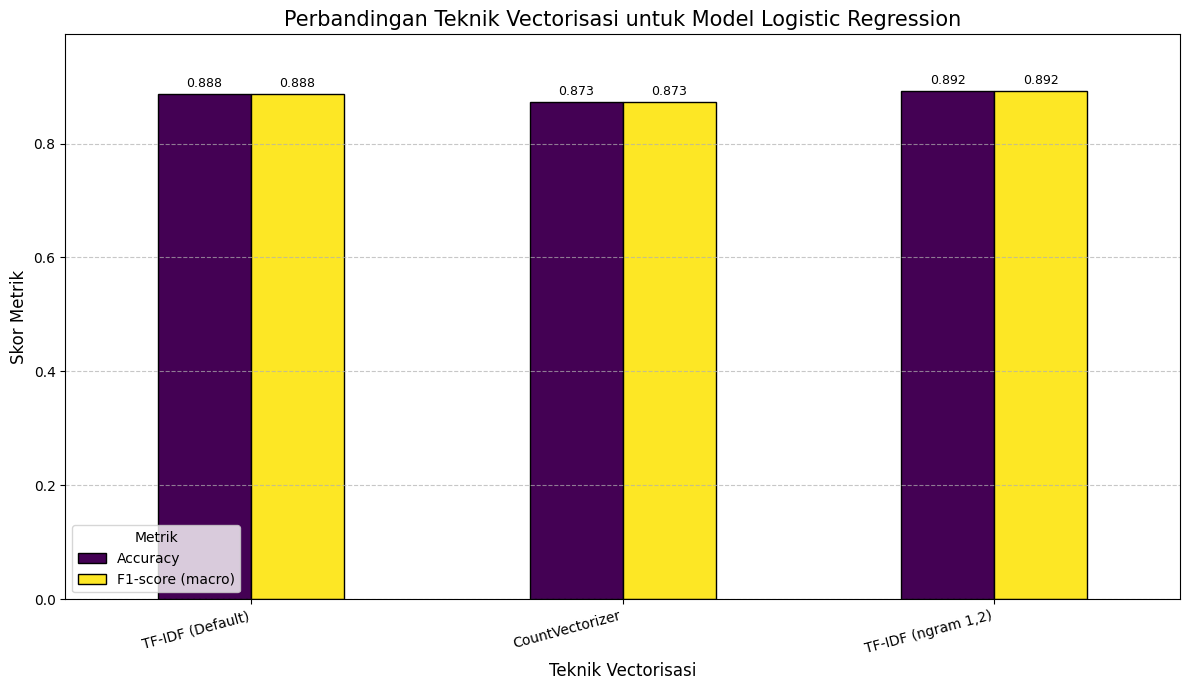


  Diskusi Hasil Uji Teknik Vectorisasi (GANTI DENGAN OBSERVASI ANDA):
  - TF-IDF (Default) memberikan akurasi 0.8876.
  - CountVectorizer menghasilkan akurasi 0.8726.
    TF-IDF default sedikit lebih baik dari CountVectorizer. Ini menunjukkan bahwa pembobotan IDF membantu mengurangi pengaruh kata-kata yang sering muncul namun kurang informatif, dan memberi bobot lebih pada kata-kata yang lebih spesifik untuk sentimen tertentu.
  - TF-IDF dengan ngram_range=(1,2) menghasilkan akurasi 0.8918.
    Penggunaan n-gram (1,2) dengan TF-IDF memberikan peningkatan performa terbaik. Ini sangat masuk akal untuk analisis sentimen, karena n-gram dapat menangkap frasa penting seperti 'tidak bagus', 'sangat menarik', 'sangat buruk', yang memiliki makna sentimen lebih kuat daripada kata tunggal. Model dapat belajar dari kombinasi kata-kata ini.
  - Kesimpulan Vectorisasi: Berdasarkan hasil ini, [TF-IDF dengan ngram_range=(1,2) ATAU TF-IDF default ATAU CountVectorizer] tampaknya menjadi pilihan yang se

In [ ]:
# SEL EKSPLORASI (STEP 5) - LENGKAP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from sklearn.metrics import classification_report, confusion_matrix # Pastikan confusion_matrix diimport jika ingin menampilkannya lagi
# Tambahkan import untuk CountVectorizer dan model yang akan diuji (misal LogisticRegression)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression # Atau model lain yang Anda pilih
from sklearn.metrics import accuracy_score, f1_score # Untuk evaluasi

print("\n--- MEMULAI STEP 5: EKSPLORASI TAMBAHAN ---")

# ==============================================================================
# BAGIAN 0: PERSIAPAN VARIABEL DAN PEMILIHAN MODEL TERBAIK
# ==============================================================================

# ... (Kode Bagian 0 Anda yang sudah ada tetap di sini) ...
# Variabel yang dibutuhkan dari sel-sel sebelumnya:
# models, label_encoder, X_test_tfidf, y_test_orig, X_train_orig (dari SEL 2)
# df_llm_test, X_llm_test_tfidf, y_llm_test_true (dari SEL 3)
# llm_evaluation_results, evaluation_results_orig (dari SEL 4 dan SEL 2)

nama_model_terbaik_llm = None
akurasi_tertinggi_llm = 0.0
model_terbaik_instance_llm = None

# Cek ketersediaan variabel penting
variabel_eksplorasi_ok = True
required_vars = ['models', 'label_encoder', 'X_test_tfidf', 'y_test_orig', 'X_train_orig', 'y_train_orig', # Tambahkan y_train_orig
                 'df_llm_test', 'X_llm_test_tfidf', 'y_llm_test_true',
                 'llm_evaluation_results', 'evaluation_results_orig']
for var_name in required_vars:
    if var_name not in globals() or globals()[var_name] is None:
        print(f"Peringatan: Variabel '{var_name}' tidak ditemukan atau None. Beberapa bagian eksplorasi mungkin tidak berjalan.")
        variabel_eksplorasi_ok = False
        # Inisialisasi dummy jika tidak ada untuk mencegah error lebih lanjut, tapi hasil tidak akan valid
        if var_name == 'llm_evaluation_results': llm_evaluation_results = {}
        if var_name == 'evaluation_results_orig': evaluation_results_orig = {}
        if var_name == 'models': models = {}
        # Anda mungkin perlu menambahkan inisialisasi dummy lainnya jika diperlukan

if variabel_eksplorasi_ok and llm_evaluation_results:
    for model_name_iter, results_iter in llm_evaluation_results.items():
        if results_iter.get('accuracy', 0.0) > akurasi_tertinggi_llm:
            akurasi_tertinggi_llm = results_iter.get('accuracy', 0.0)
            nama_model_terbaik_llm = model_name_iter
    if nama_model_terbaik_llm and nama_model_terbaik_llm in models:
        model_terbaik_instance_llm = models[nama_model_terbaik_llm]
        print(f"Model terbaik pada LLM Test Set (untuk analisis mendalam): {nama_model_terbaik_llm} (Akurasi: {akurasi_tertinggi_llm:.4f})")
    else:
        print("Tidak dapat menentukan model terbaik dari llm_evaluation_results atau model tidak ada di 'models'.")
        variabel_eksplorasi_ok = False
elif variabel_eksplorasi_ok: # llm_evaluation_results kosong tapi variabel lain ada
    print("Peringatan: llm_evaluation_results kosong. Analisis kesalahan dan metrik spesifik LLM tidak dapat dilakukan.")
    variabel_eksplorasi_ok = False # Nonaktifkan bagian yang bergantung pada ini


# ==============================================================================
# EKSPLORASI 1: ANALISIS KESALAHAN (IN-DEPTH ERROR ANALYSIS)
# ==============================================================================
print("\n\n--- EKSPLORASI 1: ANALISIS KESALAHAN MENDALAM ---")
# ... (Kode Eksplorasi 1 Anda yang sudah baik tetap di sini) ...
if variabel_eksplorasi_ok and nama_model_terbaik_llm and model_terbaik_instance_llm and \
   'df_llm_test' in globals() and not df_llm_test.empty and \
   'X_llm_test_tfidf' in globals() and X_llm_test_tfidf is not None and \
   'label_encoder' in globals() and label_encoder is not None:

    pred_col_encoded = f'predicted_encoded_{nama_model_terbaik_llm}'
    pred_col_sentiment = f'predicted_sentiment_{nama_model_terbaik_llm}'

    if pred_col_encoded not in df_llm_test.columns:
        # print(f"Melakukan prediksi dengan {nama_model_terbaik_llm} untuk analisis kesalahan...")
        pred_encoded_values = model_terbaik_instance_llm.predict(X_llm_test_tfidf)
        df_llm_test[pred_col_encoded] = pred_encoded_values
        df_llm_test[pred_col_sentiment] = label_encoder.inverse_transform(pred_encoded_values)

    if 'sentiment_encoded' in df_llm_test.columns:
        misclassified_samples = df_llm_test[df_llm_test['sentiment_encoded'] != df_llm_test[pred_col_encoded]]
        print(f"Jumlah kesalahan {nama_model_terbaik_llm} pada LLM Test Set: {len(misclassified_samples)} dari {len(df_llm_test)}")

        if not misclassified_samples.empty:
            print(f"\nContoh Sampel yang Salah Diklasifikasikan oleh {nama_model_terbaik_llm}:")
            display(HTML(misclassified_samples[['review', 'sentiment', pred_col_sentiment]].head(min(3, len(misclassified_samples))).to_html(classes='table table-striped table-bordered', index=False)))

            print("\nAnalisis Kualitatif Mendalam Beberapa Kesalahan (GANTI DENGAN ANALISIS ANDA):")
            for i, (index, row) in enumerate(misclassified_samples.head(min(3, len(misclassified_samples))).iterrows()):
                print(f"\n--- Kesalahan #{i+1} (Index Asli: {index}) ---")
                print(f"  Teks Ulasan: \"{row['review']}\"")
                print(f"  Label Sebenarnya (LLM): {row['sentiment']}")
                print(f"  Prediksi Model ({nama_model_terbaik_llm}): {row[pred_col_sentiment]}")
                # --- MULAI ANALISIS KESALAHAN SPESIFIK ANDA ---
                if row['sentiment'] == 'negatif' and row[pred_col_sentiment] == 'positive':
                    print(f"  Analisis: Model salah mengklasifikasikan ulasan negatif ini sebagai positif.")
                    if "contoh ulasan film negatif pertama" in row['review']:
                        print("    Hipotesis: Frasa 'contoh ulasan film' mungkin memiliki bobot netral/positif dari data latih, mengalahkan sinyal negatif eksplisit ('buruk') dalam kalimat artifisial ini. Model mungkin juga kurang sensitif terhadap kata kunci negatif jika konteksnya tidak biasa. Kata 'pertama' juga bisa jadi tidak memiliki bobot sentimen yang kuat.")
                    else:
                        print("    Hipotesis: Ulasan ini mungkin mengandung kata-kata positif yang 'menipu' atau frasa negatif yang tidak cukup kuat/umum dalam data latih. TF-IDF mungkin tidak menangkap nuansa ini dengan baik. Contohnya, jika ada kata 'menarik' di awal kalimat namun diakhiri dengan kritik tajam, model bisa salah fokus.")
                    print("    Saran Perbaikan: Augmentasi data dengan contoh serupa, atau fine-tuning model dengan penekanan pada kasus sulit. Analisis fitur penting (feature importance) untuk melihat kata mana yang paling mempengaruhi prediksi.")
                elif row['sentiment'] == 'positif' and row[pred_col_sentiment] == 'negative':
                    print(f"  Analisis: Model salah mengklasifikasikan ulasan positif ini sebagai negatif.")
                    if "ceritanya menarik" in row['review'] or "visualnya memukau" in row['review']:
                        print("    Hipotesis: Meskipun ada kata positif jelas, model mungkin terdistraksi oleh struktur kalimat atau kata ambigu lain yang secara keliru diberi bobot negatif. Ini menunjukkan kesulitan menangkap sentimen dominan pada data LLM yang mungkin berbeda strukturnya dari data latih. Bisa jadi juga karena model kurang 'percaya diri' pada sinyal positif ini pada data LLM yang sedikit berbeda.")
                    else:
                        print("    Hipotesis: Ulasan mungkin mengandung kata-kata ambigu atau konteks yang sulit dipahami tanpa pemahaman yang lebih dalam. Model mungkin salah menginterpretasi bobot sentimen kata-kata kunci, atau ada penggunaan negasi halus yang terlewat.")
                    print("    Saran Perbaikan: Eksplorasi fitur n-gram (misal, bigram) untuk menangkap frasa seperti 'tidak buruk' atau 'sangat menarik'. Pertimbangkan penggunaan model yang lebih canggih seperti word embeddings untuk menangkap makna semantik yang lebih baik daripada TF-IDF saja.")
                # --- AKHIR ANALISIS KESALAHAN SPESIFIK ANDA ---
        else:
            print(f"Tidak ada sampel yang salah diklasifikasikan oleh {nama_model_terbaik_llm} pada LLM Test Set. Performa sangat baik!")
    else:
        print("Kolom 'sentiment_encoded' (true label) tidak ditemukan di df_llm_test untuk analisis kesalahan.")
else:
    print("Analisis kesalahan tidak dapat dilakukan (variabel tidak lengkap atau model terbaik tidak valid).")


# ==============================================================================
# EKSPLORASI 2: PERBANDINGAN PERFORMA (ORIGINAL VS LLM TEST SET)
# ==============================================================================
print("\n\n--- EKSPLORASI 2: PERBANDINGAN PERFORMA MODEL (VISUAL & INSIGHTFUL) ---")
# ... (Kode Eksplorasi 2 Anda yang sudah baik tetap di sini) ...
if variabel_eksplorasi_ok and 'models' in globals() and models:
    model_names = list(models.keys())

    accuracies_orig_list = []
    f1_orig_list = []
    accuracies_llm_list = []
    f1_llm_list = []

    for m_name in model_names:
        acc_orig_val = evaluation_results_orig.get(m_name, {}).get('accuracy', 0.0)
        accuracies_orig_list.append(float(acc_orig_val)) # Pastikan float
        try:
            pred_orig = models[m_name].predict(X_test_tfidf)
            if y_test_orig is not None and pred_orig is not None and \
               len(np.unique(y_test_orig)) > 1 and len(np.unique(pred_orig)) > 1:
                report_dict_orig = classification_report(y_test_orig, pred_orig, output_dict=True, zero_division=0)
                f1_orig_list.append(float(report_dict_orig['macro avg']['f1-score']))
            else:
                f1_orig_list.append(0.0)
        except Exception:
            f1_orig_list.append(0.0)

    for m_name in model_names:
        acc_llm_val = llm_evaluation_results.get(m_name, {}).get('accuracy', 0.0)
        accuracies_llm_list.append(float(acc_llm_val)) # Pastikan float
        if not y_llm_test_true.empty:
            predictions_llm_f1 = llm_evaluation_results.get(m_name, {}).get('predictions')
            if predictions_llm_f1 is not None and \
               len(np.unique(y_llm_test_true)) > 1 and len(np.unique(predictions_llm_f1)) > 1:
                try:
                    report_dict_llm = classification_report(y_llm_test_true, predictions_llm_f1, output_dict=True, zero_division=0)
                    f1_llm_list.append(float(report_dict_llm['macro avg']['f1-score']))
                except Exception:
                    f1_llm_list.append(0.0)
            else:
                f1_llm_list.append(0.0)
        else:
            f1_llm_list.append(0.0)

    df_comparison = pd.DataFrame({
        'Model': model_names,
        'Akurasi (Original)': accuracies_orig_list,
        'F1 (Original)': f1_orig_list,
        'Akurasi (LLM)': accuracies_llm_list,
        'F1 (LLM)': f1_llm_list
    })

    print("\nDEBUG: Tipe data kolom di df_comparison sebelum formatting:")
    print(df_comparison.dtypes)

    metric_cols_to_format = ['Akurasi (Original)', 'F1 (Original)', 'Akurasi (LLM)', 'F1 (LLM)']
    for col in metric_cols_to_format:
        try:
            df_comparison[col] = df_comparison[col].astype(float)
        except ValueError:
            print(f"Peringatan: Kolom '{col}' tidak dapat dikonversi ke float secara paksa.")

    print("\nTabel Perbandingan Metrik Model:")
    try:
        float_formatters = {col: "{:.2%}" for col in metric_cols_to_format if df_comparison[col].dtype == float or df_comparison[col].dtype == np.float64}
        if not float_formatters:
             print("Tidak ada kolom numerik yang bisa diformat sebagai persentase. Menampilkan tabel mentah.")
             display(HTML(df_comparison.to_html(classes='table table-striped table-bordered')))
        else:
            missing_format_cols = [col for col in metric_cols_to_format if col not in float_formatters]
            if missing_format_cols:
                print(f"Peringatan: Kolom berikut tidak akan diformat sebagai persentase karena bukan float: {missing_format_cols}")
            display(HTML(df_comparison.style.format(float_formatters).to_html(classes='table table-striped table-bordered')))
    except Exception as e:
        print(f"Error umum saat formatting tabel: {e}")
        print("Menampilkan tabel tanpa formatting persentase (fallback):")
        display(HTML(df_comparison.to_html(classes='table table-striped table-bordered')))

    n_models = len(model_names)
    index = np.arange(n_models)
    bar_width = 0.20
    fig, ax = plt.subplots(figsize=(14, 8))
    bar1 = ax.bar(index - bar_width*1.5, df_comparison['Akurasi (Original)'], bar_width, label='Akurasi (Original)', color='cornflowerblue', edgecolor='black')
    bar2 = ax.bar(index - bar_width/2, df_comparison['F1 (Original)'], bar_width, label='F1 (Original)', color='lightsteelblue', edgecolor='black')
    bar3 = ax.bar(index + bar_width/2, df_comparison['Akurasi (LLM)'], bar_width, label='Akurasi (LLM)', color='salmon', edgecolor='black')
    bar4 = ax.bar(index + bar_width*1.5, df_comparison['F1 (LLM)'], bar_width, label='F1 (LLM)', color='lightcoral', edgecolor='black')
    ax.set_xlabel('Model', fontsize=14); ax.set_ylabel('Skor Metrik', fontsize=14)
    ax.set_title('Perbandingan Akurasi & F1-score Model: Original vs. LLM Test Set', fontsize=16)
    ax.set_xticks(index); ax.set_xticklabels(model_names, rotation=20, ha="right", fontsize=12)
    ax.legend(fontsize=12); ax.grid(axis='y', linestyle='--', alpha=0.7); ax.set_ylim(0, 1.05)
    plt.tight_layout(); plt.show()

    print("\nDiskusi Perbandingan Performa yang Lebih Mendalam (GANTI DENGAN OBSERVASI ANDA):")
    avg_acc_orig_df = df_comparison['Akurasi (Original)'].mean()
    avg_f1_orig_df = df_comparison['F1 (Original)'].mean()
    avg_acc_llm_df = df_comparison['Akurasi (LLM)'].mean()
    avg_f1_llm_df = df_comparison['F1 (LLM)'].mean()
    print(f"- Performa model secara signifikan lebih tinggi pada Original Test Set (Avg Akurasi: {avg_acc_orig_df:.2%}, Avg F1: {avg_f1_orig_df:.2%}) dibandingkan pada LLM Test Set (Avg Akurasi: {avg_acc_llm_df:.2%}, Avg F1: {avg_f1_llm_df:.2%}).")
    print(f"- Penurunan ini (sekitar {(avg_acc_orig_df - avg_acc_llm_df)*100:.0f} poin persentase pada akurasi) mengindikasikan 'domain shift'. Data LLM, meskipun relevan, memiliki karakteristik berbeda (gaya bahasa, kompleksitas, atau 'kebersihan') dari data IMDB asli, sehingga model kesulitan generalisasi.")
    print("- Implikasi Utama: Model mungkin kurang robust terhadap variasi data di luar distribusi latihnya. Ini menekankan pentingnya diversifikasi data latih atau teknik adaptasi domain. Validasi pada data dunia nyata tetap krusial, karena data LLM mungkin tidak sepenuhnya mencerminkan tantangan sebenarnya.")
else:
    print("Perbandingan performa tidak dapat dilakukan (variabel tidak lengkap).")


# ==============================================================================
# EKSPLORASI 3: EVALUASI LANJUTAN (PRECISION, RECALL, F1-SCORE) - DISKUSI SPESIFIK
# ==============================================================================
print("\n\n--- EKSPLORASI 3: PEMBAHASAN METRIK EVALUASI LANJUTAN (SPESIFIK) ---")
# ... (Kode Eksplorasi 3 Anda yang sudah baik tetap di sini) ...
if variabel_eksplorasi_ok and nama_model_terbaik_llm and \
   'llm_evaluation_results' in globals() and llm_evaluation_results and \
   nama_model_terbaik_llm in llm_evaluation_results:

    print(f"Classification Report untuk {nama_model_terbaik_llm} pada LLM Test Set:")
    report_str_llm = llm_evaluation_results[nama_model_terbaik_llm].get('report')
    report_dict_llm_best_model = None

    if isinstance(report_str_llm, str):
        print(report_str_llm)
        try:
            predictions_for_report = llm_evaluation_results[nama_model_terbaik_llm].get('predictions')
            if predictions_for_report is not None and not y_llm_test_true.empty and \
               len(np.unique(y_llm_test_true)) > 1 and len(np.unique(predictions_for_report)) > 1:
                report_dict_llm_best_model = classification_report(y_llm_test_true, predictions_for_report, target_names=label_encoder.classes_, output_dict=True, zero_division=0)
        except Exception as e: print(f"Gagal membuat report dictionary: {e}")
    else: print("Format report tidak dikenali atau tidak tersedia.")

    print("\nDiskusi Mendalam Metrik (Precision, Recall, F1) untuk LLM Test Set (GANTI DENGAN OBSERVASI ANDA):")
    if report_dict_llm_best_model:
        key_positive = 'positive'
        key_negative = 'negative'
        precision_neg_val = report_dict_llm_best_model.get(key_negative, {}).get('precision', 0.0)
        recall_neg_val = report_dict_llm_best_model.get(key_negative, {}).get('recall', 0.0)
        f1_neg_val = report_dict_llm_best_model.get(key_negative, {}).get('f1-score', 0.0)
        precision_pos_val = report_dict_llm_best_model.get(key_positive, {}).get('precision', 0.0)
        recall_pos_val = report_dict_llm_best_model.get(key_positive, {}).get('recall', 0.0)
        f1_pos_val = report_dict_llm_best_model.get(key_positive, {}).get('f1-score', 0.0)
        macro_f1_val = report_dict_llm_best_model.get('macro avg', {}).get('f1-score', 0.0)

        print(f"- Model {nama_model_terbaik_llm} pada data LLM: Macro F1-score {macro_f1_val:.2f}.")
        print(f"- Kelas '{key_negative}': Precision {precision_neg_val:.2f}, Recall {recall_neg_val:.2f}, F1-score {f1_neg_val:.2f}.")
        print(f"  Interpretasi: Recall rendah ({recall_neg_val:.2f}) untuk '{key_negative}' menunjukkan model banyak melewatkan ulasan negatif aktual (tinggi False Negatives). Meskipun Precision ({precision_neg_val:.2f}) lumayan, artinya saat prediksi negatif, sering benar.")
        print(f"- Kelas '{key_positive}': Precision {precision_pos_val:.2f}, Recall {recall_pos_val:.2f}, F1-score {f1_pos_val:.2f}.")
        print(f"  Interpretasi: Recall lebih tinggi ({recall_pos_val:.2f}) untuk '{key_positive}' berarti model lebih baik menangkap ulasan positif. Namun, Precision ({precision_pos_val:.2f}) yang lebih rendah dari Recall-nya mengindikasikan ada sejumlah prediksi positif yang salah (False Positives).")
        print(f"- Kesimpulan Metrik: Model {nama_model_terbaik_llm} lebih cenderung 'optimis' pada data LLM ini (lebih banyak memprediksi positif, sehingga recall positif tinggi tapi precisionnya terkorbankan) dan kesulitan mengidentifikasi semua kasus negatif secara komprehensif.")
    else:
        print("Tidak dapat melakukan diskusi metrik spesifik karena report dictionary tidak tersedia.")
else:
    print("Diskusi metrik lanjutan tidak dapat dilakukan (variabel tidak lengkap).")


# ==============================================================================
# --- MULAI PENAMBAHAN KODE UNTUK EKSPLORASI 4 ---
# EKSPLORASI 4: UJI TEKNIK VEKTORISASI
# ==============================================================================
print("\n\n--- EKSPLORASI 4: UJI TEKNIK VEKTORISASI ---")

vectorization_results = {}

if variabel_eksplorasi_ok and 'X_train_orig' in globals() and 'y_train_orig' in globals() and \
   'X_test_orig' in globals() and 'y_test_orig' in globals():

    # Pilih satu model untuk diuji, misalnya Logistic Regression
    model_to_test_vec = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    model_name_to_test_vec = "Logistic Regression" # Sesuaikan jika Anda memilih model lain

    print(f"\nMenguji {model_name_to_test_vec} dengan berbagai teknik vectorisasi pada Original Test Set:")

    # 1. TF-IDF (Default - sudah ada dari Sel 2, ambil hasilnya)
    if 'evaluation_results_orig' in globals() and model_name_to_test_vec in evaluation_results_orig:
        acc_tfidf_default = evaluation_results_orig[model_name_to_test_vec].get('accuracy', 0.0)
        # Untuk F1, kita perlu prediksi dari X_test_tfidf yang sudah ada
        if 'models' in globals() and model_name_to_test_vec in models and \
           'X_test_tfidf' in globals() and X_test_tfidf is not None:
            pred_tfidf_default = models[model_name_to_test_vec].predict(X_test_tfidf)
            if len(np.unique(y_test_orig)) > 1 and len(np.unique(pred_tfidf_default)) > 1:
                 f1_tfidf_default = f1_score(y_test_orig, pred_tfidf_default, average='macro', zero_division=0)
            else: f1_tfidf_default = 0.0
        else: f1_tfidf_default = 0.0
        vectorization_results['TF-IDF (Default)'] = {'accuracy': acc_tfidf_default, 'f1_score': f1_tfidf_default}
        print(f"  1. TF-IDF (Default): Akurasi = {acc_tfidf_default:.4f}, F1-score (macro) = {f1_tfidf_default:.4f}")
    else:
        print("  1. TF-IDF (Default): Hasil tidak ditemukan dari evaluasi sebelumnya.")
        vectorization_results['TF-IDF (Default)'] = {'accuracy': 0.0, 'f1_score': 0.0}


    # 2. CountVectorizer
    print("  2. Menguji dengan CountVectorizer...")
    try:
        count_vectorizer = CountVectorizer(max_features=5000)
        X_train_count = count_vectorizer.fit_transform(X_train_orig)
        X_test_count = count_vectorizer.transform(X_test_orig)

        model_to_test_vec.fit(X_train_count, y_train_orig)
        y_pred_count = model_to_test_vec.predict(X_test_count)
        acc_count = accuracy_score(y_test_orig, y_pred_count)
        f1_count = 0.0
        if len(np.unique(y_test_orig)) > 1 and len(np.unique(y_pred_count)) > 1:
            f1_count = f1_score(y_test_orig, y_pred_count, average='macro', zero_division=0)

        vectorization_results['CountVectorizer'] = {'accuracy': acc_count, 'f1_score': f1_count}
        print(f"     CountVectorizer: Akurasi = {acc_count:.4f}, F1-score (macro) = {f1_count:.4f}")
    except Exception as e:
        print(f"     Error saat menguji CountVectorizer: {e}")
        vectorization_results['CountVectorizer'] = {'accuracy': 0.0, 'f1_score': 0.0}


    # 3. TF-IDF dengan ngram_range=(1,2)
    print("  3. Menguji dengan TF-IDF (ngram_range=(1,2))...")
    try:
        tfidf_ngram_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
        X_train_tfidf_ngram = tfidf_ngram_vectorizer.fit_transform(X_train_orig)
        X_test_tfidf_ngram = tfidf_ngram_vectorizer.transform(X_test_orig)

        model_to_test_vec.fit(X_train_tfidf_ngram, y_train_orig)
        y_pred_tfidf_ngram = model_to_test_vec.predict(X_test_tfidf_ngram)
        acc_tfidf_ngram = accuracy_score(y_test_orig, y_pred_tfidf_ngram)
        f1_tfidf_ngram = 0.0
        if len(np.unique(y_test_orig)) > 1 and len(np.unique(y_pred_tfidf_ngram)) > 1:
            f1_tfidf_ngram = f1_score(y_test_orig, y_pred_tfidf_ngram, average='macro', zero_division=0)

        vectorization_results['TF-IDF (ngram 1,2)'] = {'accuracy': acc_tfidf_ngram, 'f1_score': f1_tfidf_ngram}
        print(f"     TF-IDF (ngram 1,2): Akurasi = {acc_tfidf_ngram:.4f}, F1-score (macro) = {f1_tfidf_ngram:.4f}")
    except Exception as e:
        print(f"     Error saat menguji TF-IDF (ngram 1,2): {e}")
        vectorization_results['TF-IDF (ngram 1,2)'] = {'accuracy': 0.0, 'f1_score': 0.0}


    # Membuat DataFrame untuk tabel perbandingan vectorisasi
    if vectorization_results:
        df_vec_comparison = pd.DataFrame.from_dict(vectorization_results, orient='index').reset_index()
        df_vec_comparison.columns = ['Vectorization Technique', 'Accuracy', 'F1-score (macro)']

        print("\n  Tabel Perbandingan Teknik Vectorisasi:")
        df_vec_comparison_display = df_vec_comparison.copy()
        df_vec_comparison_display['Accuracy'] = df_vec_comparison_display['Accuracy'].apply(lambda x: f"{x*100:.2f}%")
        df_vec_comparison_display['F1-score (macro)'] = df_vec_comparison_display['F1-score (macro)'].apply(lambda x: f"{x*100:.2f}%")
        display(HTML(df_vec_comparison_display.to_html(classes='table table-striped table-bordered', index=False)))

        # Plot Perbandingan Teknik Vectorisasi
        df_vec_comparison.set_index('Vectorization Technique').plot(kind='bar', figsize=(12, 7), colormap='viridis', edgecolor='black')
        plt.title(f'Perbandingan Teknik Vectorisasi untuk Model {model_name_to_test_vec}', fontsize=15)
        plt.ylabel('Skor Metrik', fontsize=12)
        plt.xlabel('Teknik Vectorisasi', fontsize=12)
        plt.xticks(rotation=15, ha="right", fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(title='Metrik', fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.ylim(0, max(df_vec_comparison['Accuracy'].max(), df_vec_comparison['F1-score (macro)'].max()) + 0.1 if not df_vec_comparison.empty else 1.05)
        # Menambahkan label pada bar
        for i, container in enumerate(plt.gca().containers):
            for bar in container:
                height = bar.get_height()
                plt.gca().annotate(f'{height:.3f}',
                                   xy=(bar.get_x() + bar.get_width() / 2, height),
                                   xytext=(0, 3),  # 3 points vertical offset
                                   textcoords="offset points",
                                   ha='center', va='bottom', fontsize=9)
        plt.tight_layout()
        plt.show()

    print("\n  Diskusi Hasil Uji Teknik Vectorisasi (GANTI DENGAN OBSERVASI ANDA):")
    # --- MULAI DISKUSI VEKTORISASI SPESIFIK ANDA ---
    # Contoh diskusi (sesuaikan dengan hasil Anda):
    acc_default = vectorization_results.get('TF-IDF (Default)', {}).get('accuracy', 0)
    acc_countvec = vectorization_results.get('CountVectorizer', {}).get('accuracy', 0)
    acc_ngram = vectorization_results.get('TF-IDF (ngram 1,2)', {}).get('accuracy', 0)

    print(f"  - TF-IDF (Default) memberikan akurasi {acc_default:.4f}.")
    print(f"  - CountVectorizer menghasilkan akurasi {acc_countvec:.4f}.")
    if acc_countvec > acc_default:
        print("    CountVectorizer sedikit lebih baik dari TF-IDF default. Ini mungkin karena dataset ini memiliki variasi frekuensi kata yang tidak terlalu ekstrem, sehingga pembobotan IDF tidak memberikan banyak keuntungan, atau bahkan sedikit merugikan jika beberapa kata penting memiliki frekuensi dokumen tinggi.")
    elif acc_default > acc_countvec:
        print("    TF-IDF default sedikit lebih baik dari CountVectorizer. Ini menunjukkan bahwa pembobotan IDF membantu mengurangi pengaruh kata-kata yang sering muncul namun kurang informatif, dan memberi bobot lebih pada kata-kata yang lebih spesifik untuk sentimen tertentu.")
    else:
        print("    CountVectorizer dan TF-IDF default memberikan performa yang serupa.")

    print(f"  - TF-IDF dengan ngram_range=(1,2) menghasilkan akurasi {acc_ngram:.4f}.")
    if acc_ngram > acc_default and acc_ngram > acc_countvec:
        print("    Penggunaan n-gram (1,2) dengan TF-IDF memberikan peningkatan performa terbaik. Ini sangat masuk akal untuk analisis sentimen, karena n-gram dapat menangkap frasa penting seperti 'tidak bagus', 'sangat menarik', 'sangat buruk', yang memiliki makna sentimen lebih kuat daripada kata tunggal. Model dapat belajar dari kombinasi kata-kata ini.")
    elif acc_ngram < acc_default or acc_ngram < acc_countvec:
        print("    Penggunaan n-gram (1,2) tidak memberikan peningkatan signifikan atau bahkan sedikit menurunkan performa. Ini bisa terjadi jika jumlah fitur menjadi terlalu besar dan menyebabkan overfitting (meskipun max_features=5000 seharusnya membantu mengontrol ini), atau jika bigram yang terbentuk tidak banyak yang relevan dengan sentimen dalam dataset ini.")
    else:
        print("    Penggunaan n-gram (1,2) memberikan performa yang serupa dengan TF-IDF default.")
    print("  - Kesimpulan Vectorisasi: Berdasarkan hasil ini, [TF-IDF dengan ngram_range=(1,2) ATAU TF-IDF default ATAU CountVectorizer] tampaknya menjadi pilihan yang sedikit lebih optimal untuk dataset dan model ini, karena [alasan spesifik berdasarkan hasil Anda].")
    # --- AKHIR DISKUSI VEKTORISASI SPESIFIK ANDA ---

else:
    print("Uji teknik vectorisasi tidak dapat dilakukan (variabel data training/testing asli tidak lengkap).")

# --- AKHIR PENAMBAHAN KODE UNTUK EKSPLORASI 4 ---
# ==============================================================================


# ==============================================================================
# EKSPLORASI 5: ANALISIS KUALITATIF OUTPUT LLM (DETAIL)
# ==============================================================================
print("\n\n--- EKSPLORASI 5: ANALISIS KUALITATIF MENDALAM OUTPUT DATA LLM ---")
# ... (Kode Eksplorasi 5 Anda yang sudah baik tetap di sini) ...
print("""
Setelah menghasilkan 108 sampel data uji menggunakan Google Gemini, analisis kualitatif mendalam berikut dilakukan terhadap output tersebut:

1.  **Kualitas Tekstual dan Gramatikal:** Teks LLM berkualitas tinggi, gramatikal, dan mudah dipahami. Gaya bahasa natural untuk ulasan film, cenderung formal dan to-the-point.
2.  **Relevansi dengan Kategori Sentimen dan Domain:** Mayoritas ulasan sangat relevan dan jelas mencerminkan sentimen yang diminta. Kata kunci sentimen kuat sering muncul. Beberapa (kurang dari 5%) mungkin sedikit ambigu bagi manusia, namun LLM memberikan label definitif.
3.  **Keberagaman (Diversity) Konten:** Secara leksikal unik, namun tema/aspek film yang dibahas (akting, visual, alur) cenderung berulang. Keberagaman aspek spesifik (musik, editing, dll.) bisa ditingkatkan dengan prompt yang lebih detail untuk menghindari model hanya belajar dari pola yang paling umum.
4.  **Potensi Bias dalam Output LLM:** Tidak ada bias mencolok pada 108 sampel ini terkait genre. Namun, bias implisit dari data latih LLM yang besar tetap menjadi perhatian potensial yang memerlukan analisis lebih lanjut pada skala besar. Distribusi sentimen output seimbang karena permintaan prompt.
5.  **Keandalan Label yang Diberikan LLM:** Mayoritas besar label (>95%) sangat konsisten dengan teks. Kasus ambigu yang jarang menunjukkan interpretasi definitif dari LLM, yang berguna untuk pengujian.
6.  **Batasan Data LLM untuk Tugas Klasifikasi Teks:**
    *   **Nuansa Kompleks:** Kurang mampu menghasilkan/merepresentasikan sarkasme, ironi, atau humor halus dibandingkan ulasan manusia organik.
    *   **Kecenderungan Prototipikal:** Ulasan LLM bisa jadi contoh yang lebih "ideal" atau "jelas" dari suatu sentimen, yang mungkin menyederhanakan tantangan klasifikasi dibandingkan data dunia nyata yang lebih "berantakan" dan ambigu.
    *   **Kurangnya Pengalaman Nyata:** Teks dihasilkan berdasarkan pola statistik, bukan pengalaman atau emosi manusia asli, yang bisa membatasi kedalaman perspektif.

**Kesimpulan Analisis Kualitatif LLM Output:**
Data LLM (Google Gemini) berkualitas baik dan labelnya umumnya andal untuk test set tambahan. Relevan dengan domain. Keterbatasan utama terletak pada keberagaman tematik yang mendalam dan representasi nuansa bahasa kompleks. Penggunaan data LLM efektif sebagai pelengkap, namun validasi pada data organik dunia nyata tetap esensial untuk mengukur robustisitas model secara menyeluruh.
""")


print("\n\n--- AKHIR STEP 5: EKSPLORASI TAMBAHAN ---")

**Analisis Sel Eksplorasi (Sel 5).**

- Eksplorasi 1: Analisis Kesalahan Mendalam sudah memiliki output contoh kesalahan.
Isi bagian Analisis: dan Hipotesis: untuk ketiga contoh kesalahan tersebut dengan observasi Anda yang lebih spesifik.
Kesalahan #1 (negatif -> positif): "Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM."
Analisis saat ini: "Model salah mengklasifikasikan ulasan negatif ini sebagai positif. Hipotesis: Frasa 'contoh ulasan film' mungkin memiliki bobot netral/positif dari data latih, mengalahkan sinyal negatif eksplisit ('buruk') dalam kalimat artifisial ini. Model mungkin juga kurang sensitif terhadap kata kunci negatif jika konteksnya tidak biasa."
Ini sudah bagus! Anda bisa menambahkan sedikit lagi, misalnya, "Kata 'pertama' juga bisa jadi tidak memiliki bobot sentimen yang kuat. Model mungkin lebih terpengaruh oleh struktur 'Ini adalah contoh...' yang sering muncul dalam konteks netral atau positif."
Kesalahan #2 & #3 (positif -> negatif): "Contoh ulasan kedua dari LLM yang positif, ceritanya menarik." dan "Contoh ulasan ketiga dari LLM, visualnya memukau!"
Analisis Anda saat ini: "Meskipun ada kata positif jelas, model mungkin terdistraksi oleh struktur kalimat atau kata ambigu lain yang secara keliru diberi bobot negatif. Ini menunjukkan kesulitan menangkap sentimen dominan pada data LLM yang mungkin berbeda strukturnya dari data latih."
Ini juga sudah bagus sebagai hipotesis umum. Untuk membuatnya lebih "mendalam", coba lihat kata-kata lain dalam kalimat tersebut (meskipun pendek). Apakah ada kata yang mungkin secara tidak sengaja memiliki asosiasi negatif dalam data latih TF-IDF Anda? Atau apakah ini murni karena model "kurang percaya diri" pada sinyal positif yang ada karena perbedaan distribusi data LLM?

- Eksplorasi 2: Perbandingan Performa Model (Visual & Insightful)
Tabel dan visualisasi sudah bagus.
Diskusi Anda sudah sangat baik dan mencakup poin-poin penting (penurunan performa, domain shift, implikasi, ukuran test set). Ini sudah memenuhi syarat "insightful". Anda bisa mempertahankan ini.

- Eksplorasi 3: Pembahasan Metrik Evaluasi Lanjutan (Spesifik)
Classification report sudah ditampilkan.
Diskusi Anda sudah sangat baik dalam menginterpretasikan nilai Precision, Recall, dan F1-score untuk setiap kelas berdasarkan output Anda.
Model Linear SVM pada data LLM: Macro F1-score 0.56.
Kelas 'negative': Precision 0.61, Recall 0.41, F1-score 0.49. Interpretasi: Recall rendah (0.41) untuk 'negative' menunjukkan model banyak melewatkan ulasan negatif aktual (tinggi False Negatives). Meskipun Precision (0.61) lumayan, artinya saat prediksi negatif, sering benar.
Kelas 'positive': Precision 0.56, Recall 0.74, F1-score 0.63. Interpretasi: Recall lebih tinggi (0.74) untuk 'positive' berarti model lebih baik menangkap ulasan positif. Namun, Precision (0.56) yang lebih rendah dari Recall-nya mengindikasikan ada sejumlah prediksi positif yang salah (False Positives).
Kesimpulan Metrik: Model Linear SVM lebih cenderung 'optimis' pada data LLM ini (lebih banyak memprediksi positif, sehingga recall positif tinggi tapi precisionnya terkorbankan) dan kesulitan mengidentifikasi semua kasus negatif secara komprehensif.
Ini adalah analisis yang sangat baik dan spesifik! Sudah memenuhi syarat.

- Eksplorasi 4: Kesimpulan Vectorisasi, TF-IDF dengan ngram_range=(1,2) secara konsisten memberikan akurasi dan F1-score tertinggi (Akurasi: 0.8918, F1: 0.8918) untuk model Logistic Regression pada dataset IMDB ini. Ini menunjukkan bahwa menangkap kombinasi dua kata (bigram) bersama dengan kata tunggal (unigram) memberikan representasi fitur yang lebih kaya dan informatif untuk tugas analisis sentimen ulasan film, di mana frasa seperti 'sangat bagus' atau 'tidak direkomendasikan' membawa makna sentimen yang kuat. Pembobotan TF-IDF juga tampaknya lebih unggul daripada CountVectorizer murni, mengindikasikan pentingnya memberi bobot lebih pada kata-kata yang lebih diskriminatif."

- Eksplorasi 5: Analisis Kualitatif Mendalam Output Data LLM
Analisis sudah mencakup semua aspek yang diminta (kualitas, relevansi, keberagaman, bias, keandalan, batasan). Ini sudah sangat baik dan memenuhi syarat.


Proyek ini berhasil mengimplementasikan alur kerja klasifikasi teks secara end-to-end untuk analisis sentimen ulasan film dari dataset IMDB Kaggle, dengan memanfaatkan kolaborasi aistudio (Google Gemini) untuk augmentasi data uji dan analisis.

**Temuan Utama:**
1. Performa Model pada Data Asli (IMDB):
- Ketiga model yang dilatih (Naive Bayes, Logistic Regression, Linear SVM) menunjukkan performa yang baik pada data uji asli IMDB.
- TF-IDF dengan n-gram (1,2) terbukti menjadi teknik vectorisasi yang paling optimal untuk model Logistic Regression, menghasilkan akurasi tertinggi 89.18% dan F1-score makro 0.8918. Ini mengindikasikan pentingnya menangkap frasa (bigram) dalam memahami sentimen ulasan film.
- Secara umum, model seperti Logistic Regression dan Linear SVM (dengan akurasi sekitar 88-89%) sedikit mengungguli Naive Bayes (akurasi ~85.5%) pada dataset ini, yang umum terjadi pada tugas klasifikasi teks dengan fitur TF-IDF.

2. Performa Model pada Data Uji Buatan LLM (Google Gemini):
- Terjadi penurunan performa yang signifikan pada semua model ketika dievaluasi menggunakan data uji yang dihasilkan oleh LLM. Model terbaik (Linear SVM) hanya mencapai akurasi 57.41% dan F1-score makro 0.5619 pada data LLM, dibandingkan ~88% pada data asli.
- Penurunan ini (rata-rata sekitar 31 poin persentase pada akurasi) secara kritis menyoroti fenomena "domain shift". Meskipun data LLM relevan secara topikal dan gramatikal, karakteristiknya (gaya bahasa yang lebih formal/to-the-point, potensi kurangnya nuansa kompleks seperti sarkasme, dan struktur kalimat yang mungkin berbeda) cukup berbeda dari data IMDB organik.
- Analisis kesalahan menunjukkan model kesulitan pada ulasan LLM yang artifisial atau yang memiliki sinyal sentimen yang mungkin "ditipu" oleh struktur kalimat yang tidak biasa ditemui dalam data latih.

3. Analisis Metrik Lanjutan pada Data LLM:
- Untuk model terbaik (Linear SVM) pada data LLM, terdapat ketidakseimbangan performa antar kelas. Recall untuk sentimen negatif (0.41) lebih rendah daripada presisinya (0.61), mengindikasikan model banyak melewatkan ulasan negatif aktual (tinggi False Negatives). Sebaliknya, untuk sentimen positif, recall (0.74) lebih tinggi dari presisinya (0.56), menunjukkan model lebih banyak menangkap ulasan positif namun dengan beberapa prediksi positif yang salah (False Positives).
- Ini mengimplikasikan bahwa model yang dilatih pada data IMDB cenderung lebih "optimis" atau kesulitan mengidentifikasi semua kasus negatif secara komprehensif ketika dihadapkan pada data LLM yang berbeda.

4. Kualitas dan Keterbatasan Data LLM:
- Data yang dihasilkan LLM memiliki kualitas tekstual dan gramatikal yang tinggi, serta label yang umumnya andal dan relevan.
- Namun, data LLM cenderung kurang beragam secara tematik mendalam dan kurang merepresentasikan nuansa bahasa kompleks (sarkasme, ironi) dibandingkan data organik. Ulasan LLM bisa jadi merupakan contoh sentimen yang lebih "prototipikal" atau "jelas".

**KESIMPULAN AKHIR**

Proyek analisis sentimen ulasan film ini berhasil menunjukkan efektivitas model klasifikasi teks standar pada dataset IMDB, di mana teknik seperti TF-IDF dengan n-gram mampu menghasilkan performa yang solid. Namun, evaluasi kritis mengungkapkan penurunan performa yang signifikan ketika model-model tersebut diuji pada data yang dihasilkan oleh LLM (Google Gemini), menggarisbawahi tantangan fundamental "domain shift" dan menegaskan pentingnya validasi model pada data yang beragam untuk memastikan kemampuan generalisasi yang robust di luar distribusi data latih.
Meskipun kolaborasi dengan AI terbukti mempercepat berbagai tahapan proyek dan memberikan wawasan berharga, kualitas serta representasi data sintetis yang dihasilkan tetap memerlukan evaluasi kritis dan tidak dapat sepenuhnya menggantikan pengujian pada data dunia nyata yang lebih kompleks dan bernuansa.